In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading loan dataset from local
loan_df = pd.read_csv('./loan.csv')
loan_df.head()

C:\Users\gopik\AppData\Local\Temp\ipykernel_22132\1595602227.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('./loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.shape

(39717, 111)

In [4]:
# making a copy and continuing the analysis with that copied dataset to prevent unnecessary loadin of data when needed
loan_df_copy = loan_df.copy(deep=True)

In [5]:
defs_df = pd.read_excel('Data_Dictionary.xlsx')
defs_df

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


# 1. Data Cleansing

### a. Checklist for fixing Columns
        i.   Delete unnecessary columns
        ii.  Merge columns to create unique identifiers if needed
        iii. Split columns for more data
        iv.  Add missing column names
        v.   Align misaligned columns

In [7]:
(loan_df_copy.isnull().sum()/len(loan_df)).sort_values(ascending=False).head(50)

verification_status_joint         1.0
annual_inc_joint                  1.0
mo_sin_old_rev_tl_op              1.0
mo_sin_old_il_acct                1.0
bc_util                           1.0
bc_open_to_buy                    1.0
avg_cur_bal                       1.0
acc_open_past_24mths              1.0
inq_last_12m                      1.0
total_cu_tl                       1.0
inq_fi                            1.0
total_rev_hi_lim                  1.0
all_util                          1.0
max_bal_bc                        1.0
open_rv_24m                       1.0
open_rv_12m                       1.0
il_util                           1.0
total_bal_il                      1.0
mths_since_rcnt_il                1.0
open_il_24m                       1.0
open_il_12m                       1.0
open_il_6m                        1.0
open_acc_6m                       1.0
tot_cur_bal                       1.0
tot_coll_amt                      1.0
mo_sin_rcnt_rev_tl_op             1.0
mo_sin_rcnt_

1. There are a lot of columns which have null values, so we can drop them directly
2. There are some columns who have majority missing/null values, so will drop them as well.

For this purpose we take a rough ratio number of **0.6** i.e., we drop the columns which have **60%** or more null values.

#### Dropping the following 57 columns which satisfy that condition

verification_status_joint, annual_inc_joint, mo_sin_old_rev_tl_op, mo_sin_old_il_acct, bc_util, bc_open_to_buy, avg_cur_bal, acc_open_past_24mths, inq_last_12m, total_cu_tl, inq_fi, total_rev_hi_lim, all_util, max_bal_bc, open_rv_24m, open_rv_12m, il_util, total_bal_il, mths_since_rcnt_il, open_il_24m, open_il_12m, open_il_6m, open_acc_6m, tot_cur_bal, tot_coll_amt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, num_rev_tl_bal_gt_0, total_bc_limit, total_bal_ex_mort, tot_hi_cred_lim, percent_bc_gt_75, pct_tl_nvr_dlq, num_tl_op_past_12m, num_tl_90g_dpd_24m,  num_tl_30dpd, num_tl_120dpd_2m, num_sats, num_rev_accts, mths_since_recent_bc, num_op_rev_tl, num_il_tl, num_bc_tl, num_bc_sats, num_actv_rev_tl, num_actv_bc_tl, num_accts_ever_120_pd, mths_since_recent_revol_delinq, mths_since_recent_inq, mths_since_recent_bc_dlq, dti_joint, total_il_high_credit_limit, mths_since_last_major_derog, next_pymnt_d, mths_since_last_record, mths_since_last_delinq

In [8]:
new_loan_df = loan_df_copy.loc[:,loan_df_copy.isnull().sum()/len(loan_df_copy) < 0.6]
new_loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
new_loan_df.shape

(39717, 54)

In [10]:
(new_loan_df.isnull().sum()/len(new_loan_df)).sort_values(ascending=False)

desc                          0.325855
emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
total_rec_prncp               0.000000
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_acc                     0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
collection_recovery_fee       0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
pub_rec                       0.000000
last_pymnt_amnt               0.000000
policy_code                   0.000000
application_type         

In [11]:
new_loan_df.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

From the above unique values count it can be observed that the values with just 1 unique value doesn't add any value in our analysis so we can discard them

In [12]:
# Dropping the columns having only one unique value, because it doesn't add any value
new_loan_df = new_loan_df.loc[:,new_loan_df.nunique()  != 1]

In [13]:
new_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Dropping Columns which don't add any meaning to the analysis like __id__, __member_id__, __desc__, __zip_code__, __url__, __addr_state__, etc

In [14]:
new_loan_df.drop(['id','desc','zip_code','addr_state','url','member_id'],axis=1,inplace=True)

In [15]:
new_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [16]:
new_loan_df.nunique().sort_values(ascending=False)

total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
open_acc                      40
sub_grade                     35
purpose                       14
delinq_2yrs                   11
emp_length

Let's observe the columns which has high unique values and as well as low unique values one by one <br>
&nbsp;&nbsp;&nbsp;&nbsp;Like total_pymnt, total_pymnt_inv, total_rec_int, last_pymnt_amnt, emp_title    -  Have high unique values <br>
&nbsp;&nbsp;&nbsp;&nbsp;and  term, pub_rec_bankruptcies, loan_status, verification_status, pub_rec  -  Have very low unique values <br>

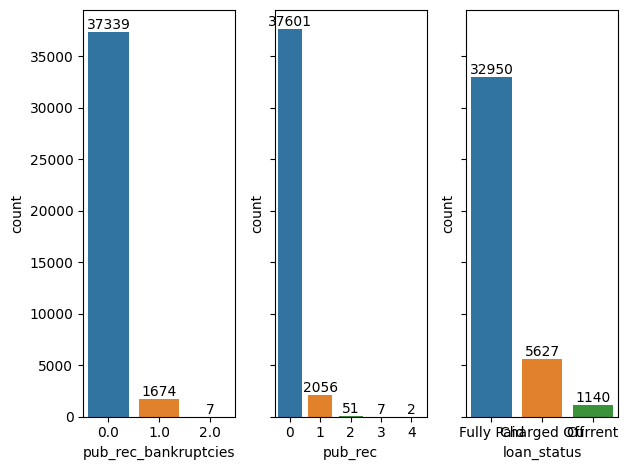

In [17]:
f, ax_types= plt.subplots(ncols = 3 , sharey=True)

ax_bnkrpt = sns.countplot(data=new_loan_df , x='pub_rec_bankruptcies', ax=ax_types[0])
ax_bnkrpt.bar_label(ax_bnkrpt.containers[-1], label_type='edge')

ax_pubrec = sns.countplot(data=new_loan_df , x='pub_rec', ax=ax_types[1])
ax_pubrec.bar_label(ax_pubrec.containers[-1], label_type='edge')

ax_status = sns.countplot(data=new_loan_df , x='loan_status', ax=ax_types[2])
ax_status.bar_label(ax_status.containers[-1], label_type='edge')

f.tight_layout()
plt.show()

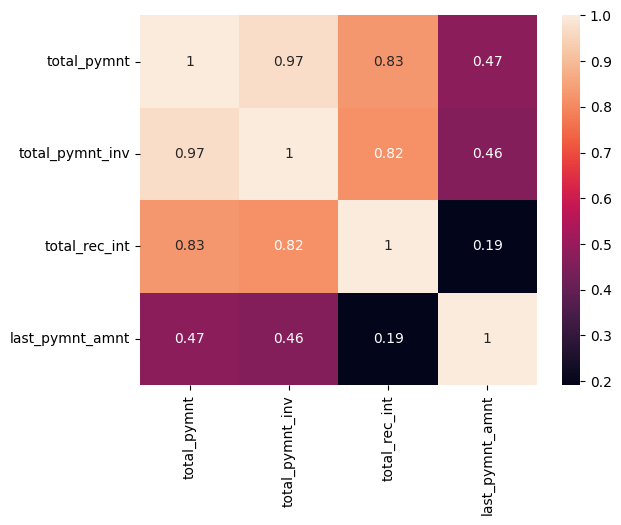

In [18]:
sns.heatmap(new_loan_df[['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt']].corr(), annot=True)
plt.show()

In [19]:
print(new_loan_df.emp_title.nunique())
new_loan_df.emp_title.value_counts()

28820


emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

From the above three cells, we observed that
1. __public_rec_bankruptcies__ and __pub_rec__ have very high skewed values which are not useful in drawing insights. So we drop those columns.
2. Although the variable/column __loan_status__ is also included into the graph but since it is the target variable, we will not drop it.
3. Columns __total_pymnt__ & __total_pymnt_inv__ have very high correlation and so we can drop one of them. 
4. Although column __emp_title__ has unique values and categorical in nature, the value of each category is not that significant and wouldn't help us much in our analysis. So we will drop it as well.

In [20]:
new_loan_df.drop(['pub_rec_bankruptcies','pub_rec','total_pymnt','emp_title'] ,axis=1 , inplace=True)

In [21]:
print(new_loan_df.shape)
new_loan_df.head()

(39717, 35)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [22]:
new_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### b. Checklist for fixing Rows
    i.   Delete Summary Rows
    ii.  Delete incorrect Rows
    iii. Delete extra Rows

Let's check for rows with less than 10 unique values that might indicate a particular row is an extra row

In [23]:
new_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [24]:
new_loan_df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,0.0,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,0.0,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,0.0,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,0.0,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07
39716,7500,7500,800.0,36 months,13.75%,255.43,E,E2,< 1 year,OWN,...,0.0,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10


In [25]:
new_loan_df[new_loan_df.nunique(axis=1)<10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d


We observed that there are no summary rows & and also no rows with missing values and duplicate values <br>
<br>
So it concludes our checklist for checking for missing Rows

### c. Fix Missing Values
        1. Set values as missing values i.e., NA or null
        2. fill missing values with constant data, column functions or with external data
        3. Remove missing values
        4. Fill partially missing values

In [26]:
new_loan_df.loc[:,(new_loan_df.isnull().sum()/len(new_loan_df))>0]

,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d
0,10+ years,Computer,83.70%,Jan-15,May-16
1,< 1 year,bike,9.40%,Apr-13,Sep-13
2,10+ years,real estate business,98.50%,Jun-14,May-16
3,10+ years,personel,21%,Jan-15,Apr-16
4,1 year,Personal,53.90%,May-16,May-16
...,...,...,...,...,...
39712,4 years,Home Improvement,13.10%,Jul-10,Jun-10
39713,3 years,Retiring credit card debt,26.90%,Jul-10,Jul-10
39714,< 1 year,MBA Loan Consolidation,19.40%,Apr-08,Jun-07
39715,< 1 year,JAL Loan,0.70%,Jan-08,Jun-07


In [27]:
print(new_loan_df.emp_length.isnull().sum(), 'null values in "emp_length" column')
print(new_loan_df.title.isnull().sum(), 'null values in "title" column')
print(new_loan_df.revol_util.isnull().sum(), 'null values in "revol_util" column')
print(new_loan_df.last_pymnt_d.isnull().sum(), 'null values in "last_pymnt_d" column')
print(new_loan_df.last_credit_pull_d.isnull().sum(), 'null values in "last_credit_pull_d" column')

print(len(new_loan_df))

new_loan_df[['emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d']].isnull().sum()/len(new_loan_df)

1075 null values in "emp_length" column
11 null values in "title" column
50 null values in "revol_util" column
71 null values in "last_pymnt_d" column
2 null values in "last_credit_pull_d" column
39717


emp_length            0.027066
title                 0.000277
revol_util            0.001259
last_pymnt_d          0.001788
last_credit_pull_d    0.000050
dtype: float64

Since the maximum number of values that are missing are in 'emp_length' and that too only a mere 2% we can remove the rows with the missing 'emp_length' values

In [28]:
new_loan_df= new_loan_df[~new_loan_df['emp_length'].isnull()]

In [29]:
new_loan_df[['emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d']].isnull().sum()

emp_length             0
title                 10
revol_util            47
last_pymnt_d          66
last_credit_pull_d     2
dtype: int64

And now the missing are very negligible for other columns we can either drop them as well.

In [30]:
temp_df = new_loan_df.dropna(axis=0, subset = ['last_pymnt_d', 'last_credit_pull_d','title','revol_util'])
new_loan_df[['emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d']].isnull().sum()

emp_length             0
title                 10
revol_util            47
last_pymnt_d          66
last_credit_pull_d     2
dtype: int64

In [31]:
temp_df[['emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d']].isnull().sum()

emp_length            0
title                 0
revol_util            0
last_pymnt_d          0
last_credit_pull_d    0
dtype: int64

In [32]:
print(new_loan_df.shape)
print(temp_df.shape)

(38642, 35)
(38521, 35)


In [33]:
new_loan_df_temp_cp = new_loan_df.copy(deep=True)

In [34]:
new_loan_df = new_loan_df.dropna(axis=0, subset = ['last_pymnt_d', 'last_credit_pull_d','title','revol_util'])

In [35]:
print(new_loan_df.shape)
new_loan_df.tail(1)

(38521, 35)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
39716,7500,7500,800.0,36 months,13.75%,255.43,E,E2,< 1 year,OWN,...,0.0,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10


In [37]:
#resetting the index and dropping the original one because we have deleted some rows and might cause some issue in the future analysis
new_loan_df.reset_index(inplace=True, drop=True)
new_loan_df.tail(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
38520,7500,7500,800.0,36 months,13.75%,255.43,E,E2,< 1 year,OWN,...,0.0,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10


In [38]:
new_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38521 entries, 0 to 38520
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38521 non-null  int64  
 1   funded_amnt              38521 non-null  int64  
 2   funded_amnt_inv          38521 non-null  float64
 3   term                     38521 non-null  object 
 4   int_rate                 38521 non-null  object 
 5   installment              38521 non-null  float64
 6   grade                    38521 non-null  object 
 7   sub_grade                38521 non-null  object 
 8   emp_length               38521 non-null  object 
 9   home_ownership           38521 non-null  object 
 10  annual_inc               38521 non-null  float64
 11  verification_status      38521 non-null  object 
 12  issue_d                  38521 non-null  object 
 13  loan_status              38521 non-null  object 
 14  purpose               

# Understanding the Data

Let's start to analyse and understand the data.
We can broadly divide this loan data into 3 categorical variables
1. Which are related to the applicant (id,member_id, zipcode, etc)
2. Loan charecteristics (loan amount, purpose, loan status, interest rate etc)
3. Customer behaviour variables (Those which are generated after the loan is approved)

For this exercise since we are trying to analyse which variables are behind loan defaulting. We want to ignore the behavioural variables.

In [39]:
customer_beh_var = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "revol_bal",
  "revol_util",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [40]:
final_loan_df = new_loan_df.drop(customer_beh_var, axis=1)
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38521 entries, 0 to 38520
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38521 non-null  int64  
 1   funded_amnt          38521 non-null  int64  
 2   funded_amnt_inv      38521 non-null  float64
 3   term                 38521 non-null  object 
 4   int_rate             38521 non-null  object 
 5   installment          38521 non-null  float64
 6   grade                38521 non-null  object 
 7   sub_grade            38521 non-null  object 
 8   emp_length           38521 non-null  object 
 9   home_ownership       38521 non-null  object 
 10  annual_inc           38521 non-null  float64
 11  verification_status  38521 non-null  object 
 12  issue_d              38521 non-null  object 
 13  loan_status          38521 non-null  object 
 14  purpose              38521 non-null  object 
 15  title                38521 non-null 

Since we are analyzing the data let's observe the target variable i.e., __loan_status__

In [41]:
#Our Final variable which we are interested in is whether a person defaults or not based on other conditions/variables available
final_loan_df.loan_status.value_counts()

loan_status
Fully Paid     32103
Charged Off     5320
Current         1098
Name: count, dtype: int64

As we can see from above there are records with people whose loan is currently being paid. 
We can do other type of analysis on this kind of data like if they default for some months while they are paying then based on the previous persons data we can try to perform some analysis on this behaviour. 
For the due course of this assignment since we are more interested in just the initial conditions which might affect the loan_status of the person repaying the loan or defaulting and since these values analysis falls more into the behavioural analysis we will drop the rows with the __'loan_status'__ as __'Current'__

In [42]:
# dropping the rows with 'Current' loan_status
final_loan_df = final_loan_df[final_loan_df['loan_status']!='Current']
final_loan_df.loan_status.value_counts()

loan_status
Fully Paid     32103
Charged Off     5320
Name: count, dtype: int64

Let's tag the 'loan_status' to 'category' and convert the variable __'loan_status'__ to __0__ or __1__ <br>
where __0__ = means __'Fully Paid'__ <br>
and   __1__ = means __'Charged Off'__

In [43]:
final_loan_df['loan_status_num'] = final_loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
final_loan_df['loan_status_num'] = final_loan_df['loan_status_num'].apply(lambda x: pd.to_numeric(x) )
# final_loan_df['loan_status_num'] = final_loan_df['loan_status_num'].astype('category')
final_loan_df.loan_status.value_counts()

loan_status
Fully Paid     32103
Charged Off     5320
Name: count, dtype: int64

In [44]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37423 entries, 0 to 38520
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37423 non-null  int64  
 1   funded_amnt          37423 non-null  int64  
 2   funded_amnt_inv      37423 non-null  float64
 3   term                 37423 non-null  object 
 4   int_rate             37423 non-null  object 
 5   installment          37423 non-null  float64
 6   grade                37423 non-null  object 
 7   sub_grade            37423 non-null  object 
 8   emp_length           37423 non-null  object 
 9   home_ownership       37423 non-null  object 
 10  annual_inc           37423 non-null  float64
 11  verification_status  37423 non-null  object 
 12  issue_d              37423 non-null  object 
 13  loan_status          37423 non-null  object 
 14  purpose              37423 non-null  object 
 15  title                37423 non-null  obje

Let's continue with Standardizing the Values in Data Cleaning Step

### d. Standardizing Values
        1. Standardizing Numbers
            i.   Remove Outliers
            ii.  Standardize units. Coverting lbs to kgs, miles to kms
            iii. Scale values if required. Fit to percentage
            iv.  Standardize precision. Round to nearest decimal

In [45]:
final_loan_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [46]:
#making a list of numeric data type columns
num_cols = [column for column in final_loan_df.columns if final_loan_df[column].dtype in ['int64','float64'] ]
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'total_acc',
 'loan_status_num']

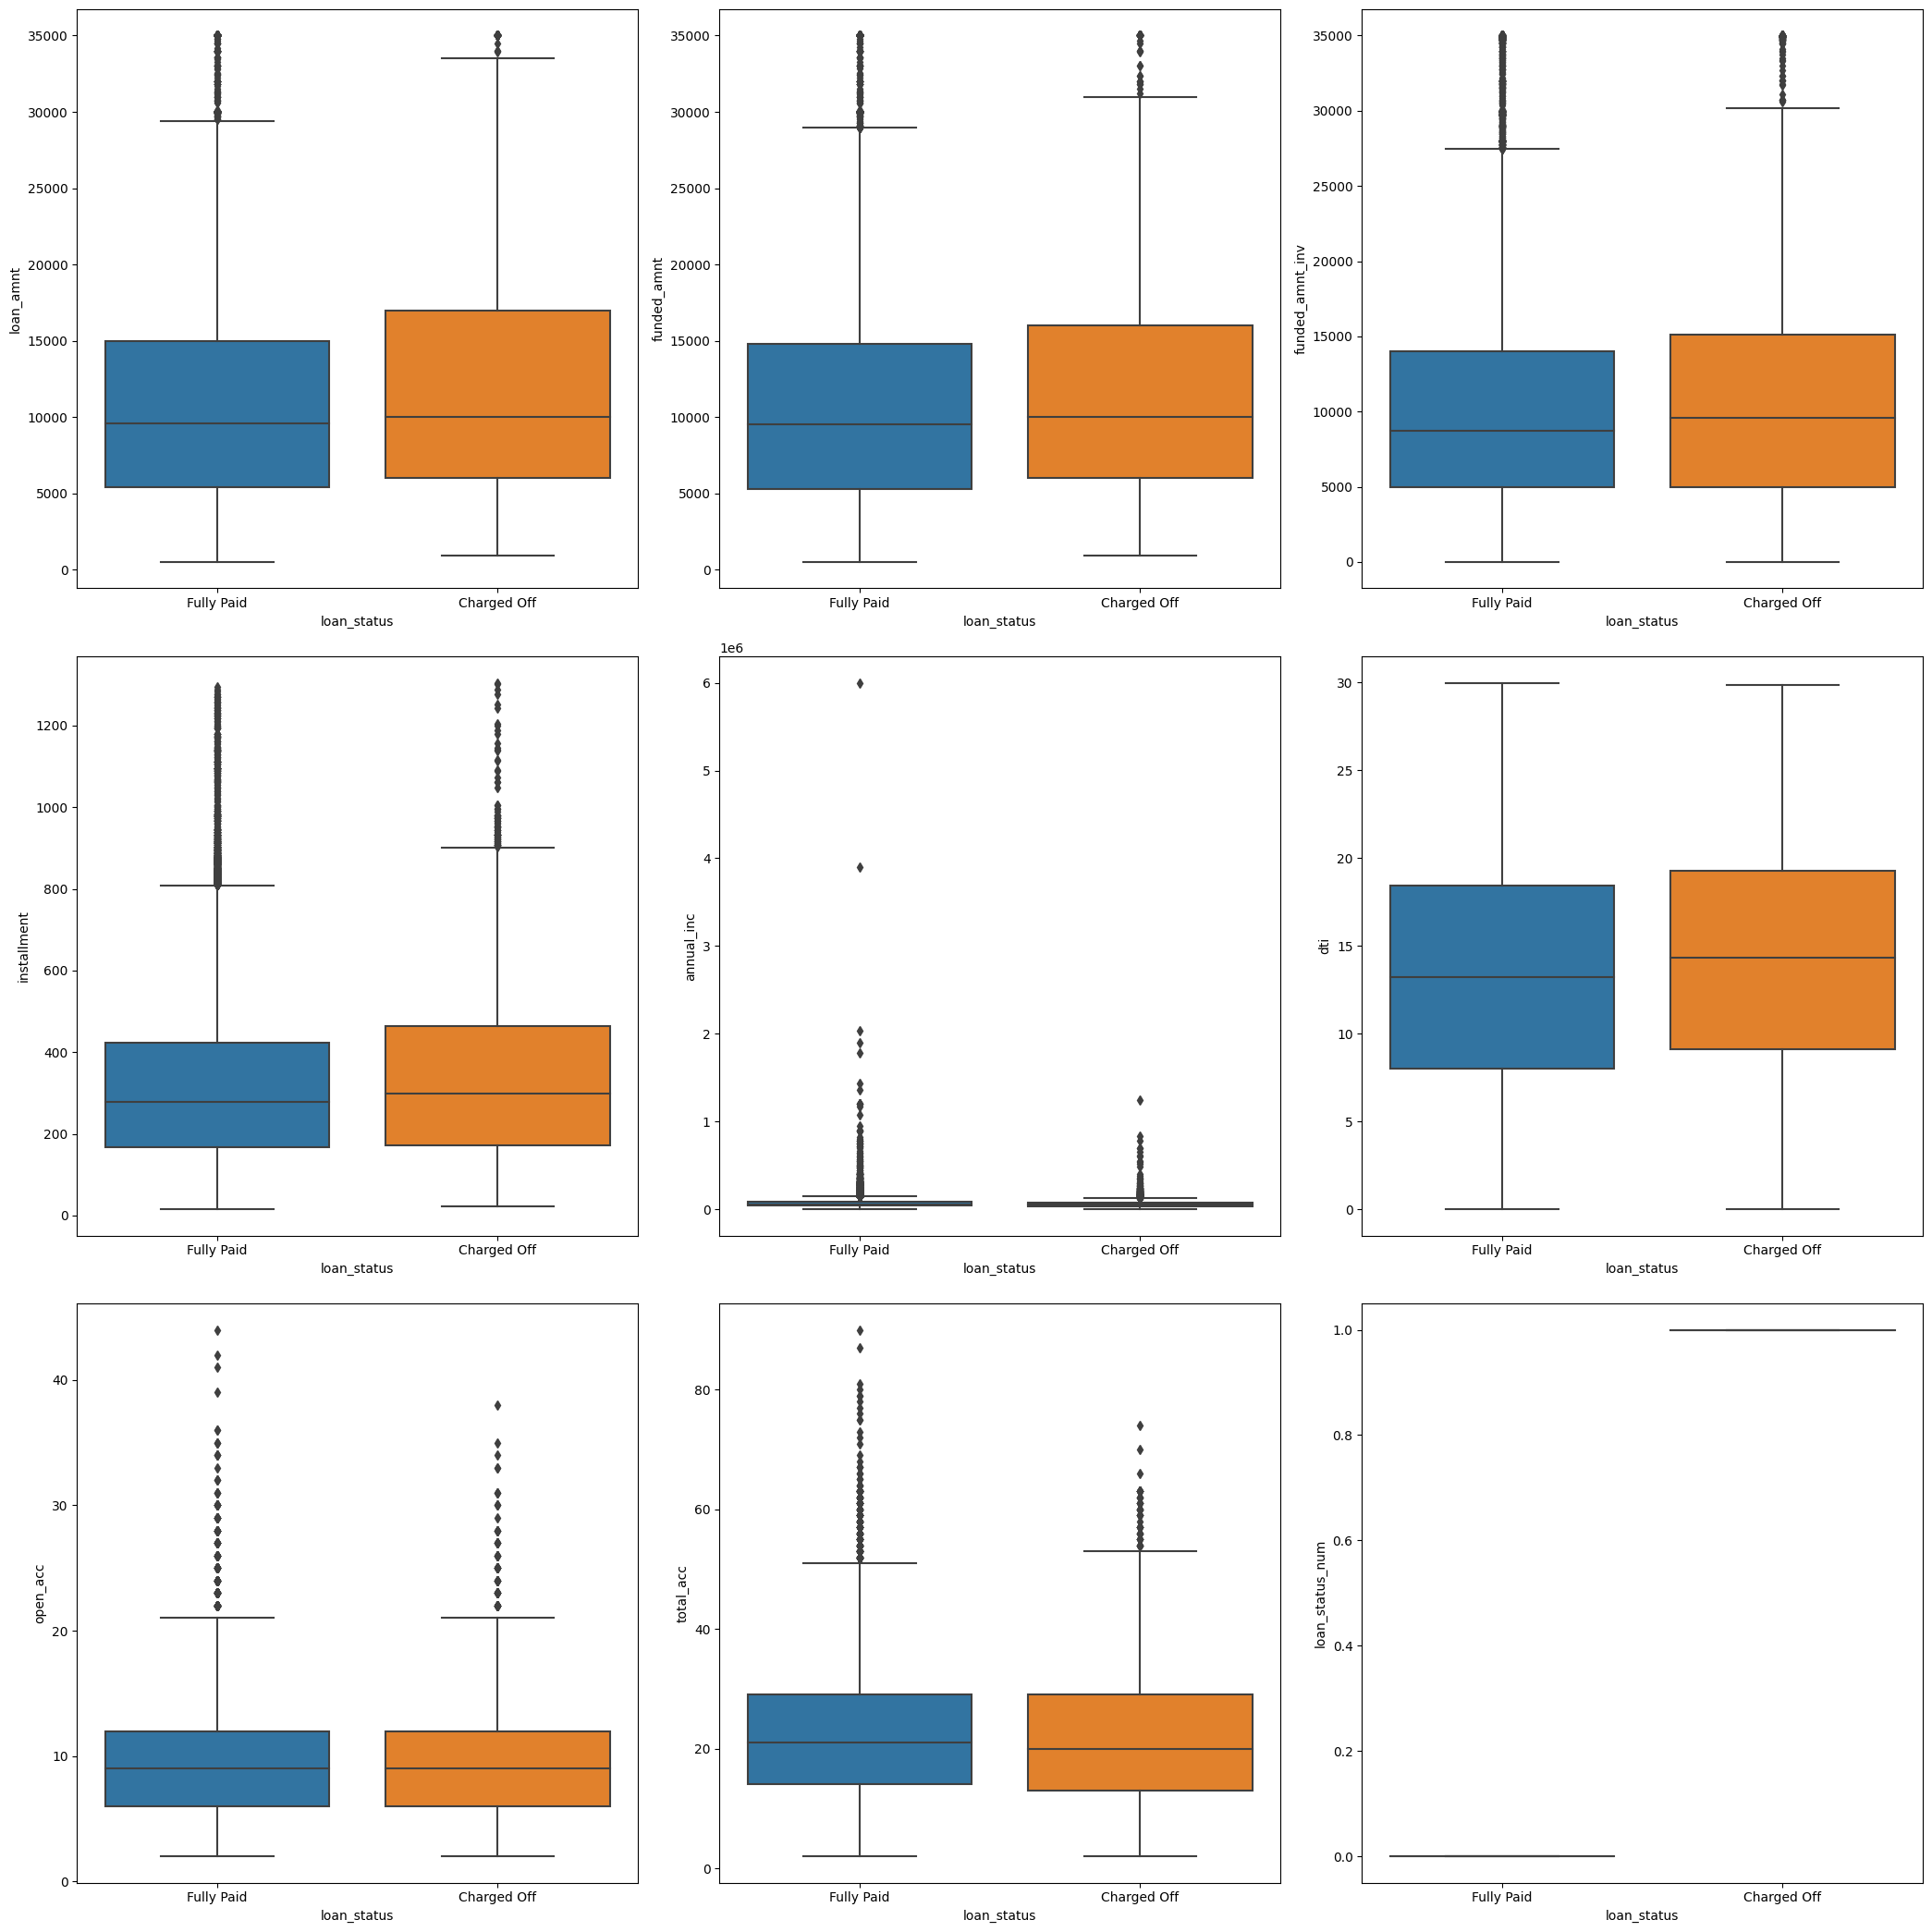

In [47]:
#define the rows and columns
nr_rows = 3
nr_cols = 3

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*7))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_cols):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.boxplot(x='loan_status', y=num_cols[i], data=final_loan_df, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

We can drop the data rows by removing the outlier from the data to study the relation, we will revisit this in the Analysis part

Other plots seems a bit better, but the plot between __loan_status__ and __annual_inc__ is skewed. <br>
We can remove the outliers from it to study the relation between them in the upcoming parts in detail. <br>
<br>
But for now we can let the outliers be in the original dataset.

2. Standardizing Texts <br>
    i.   Remove extra charecters <br>
    ii.  Standardize case <br>
    iii. Standardize format
    
So now let's study columns like Dates, Names etc..

In [48]:
final_loan_df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
dti                    float64
open_acc                 int64
total_acc                int64
loan_status_num          int64
dtype: object

Although by the data types of variables and definitions of variables which are objects we see that there are no variables of type Dates or names. <br>
Anyway let's observe the object __dtype__ variables

In [49]:
final_loan_df.loc[:,final_loan_df.dtypes=='object'].head(10)

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan
7,36 months,18.64%,E,E1,9 years,RENT,Source Verified,Dec-11,Fully Paid,car,Car Downpayment
8,60 months,21.28%,F,F2,4 years,OWN,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio
9,60 months,12.69%,B,B5,< 1 year,RENT,Verified,Dec-11,Charged Off,other,Building my credit history.
10,60 months,14.65%,C,C3,5 years,OWN,Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation


As expected none of them fall into the above category. <br>
Although we  see that __int_rate__, __emp_length__ and __issue_date__ variables are of different types and we have to fix them. <br>
Which brings us to the next section of __Fixing Invalid Values__

### e. Fix Invalid Values
        1. Encode unicode properly
        2. Convert incorrect data types. String to Num, String to Date etc...
        3. Correct values
        4. Correct wrong structure
        5. Correct values beyond range
        6. Validate internal rules

In [50]:
# Let's extract the int_rate from the percent and convert to number
final_loan_df['int_rate'] = final_loan_df['int_rate'].apply(lambda x : pd.to_numeric(x.split("%")[0]) )
final_loan_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,open_acc,total_acc,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,3,9,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,3,4,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,2,10,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,10,37,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,9,12,0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,7,11,0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,5.35,4,4,0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,5.55,11,13,1
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,18.08,2,3,1
10,6500,6500,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,16.12,14,23,0


In [51]:
#Converting string type __emp_length__ to num
import re
final_loan_df['emp_length'] = final_loan_df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
final_loan_df['emp_length'] = final_loan_df['emp_length'].apply(lambda x: pd.to_numeric(x))

final_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,open_acc,total_acc,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,3,9,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,3,4,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,2,10,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,10,37,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,9,12,0


In [52]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37423 entries, 0 to 38520
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37423 non-null  int64  
 1   funded_amnt          37423 non-null  int64  
 2   funded_amnt_inv      37423 non-null  float64
 3   term                 37423 non-null  object 
 4   int_rate             37423 non-null  float64
 5   installment          37423 non-null  float64
 6   grade                37423 non-null  object 
 7   sub_grade            37423 non-null  object 
 8   emp_length           37423 non-null  int64  
 9   home_ownership       37423 non-null  object 
 10  annual_inc           37423 non-null  float64
 11  verification_status  37423 non-null  object 
 12  issue_d              37423 non-null  object 
 13  loan_status          37423 non-null  object 
 14  purpose              37423 non-null  object 
 15  title                37423 non-null  obje

### f. Filter Data
        1. Deduplicate Data
        2. Filter rows
        3. Filter columns
        4. Aggregate data

We have already filtered most of the data but let's check the data again

<Axes: >

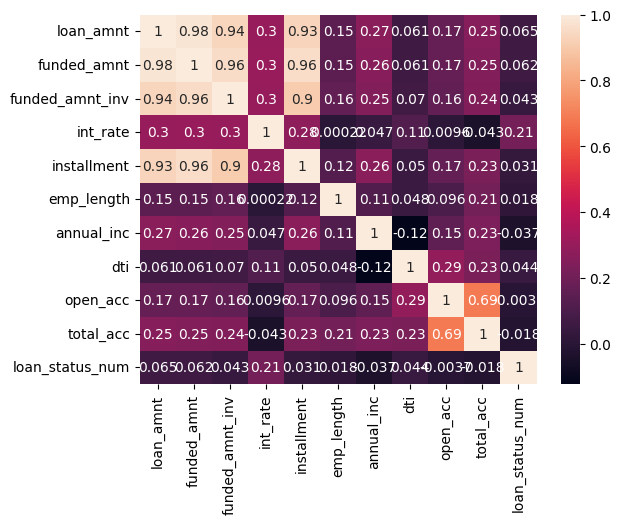

In [53]:
sns.heatmap(final_loan_df.loc[:,final_loan_df.dtypes !=object].corr(), annot=True)

As we can infer from the above heatmap, variables __loan_amnt__, __funded_amnt__, __funded_amnt_inv__, __installment__ have high correlation. <br>
Although we can drop off three out of 4 of them and do analysis only with one of them, just to be on the safe side we will drop only 2 variables that are __funded_amnt__ and __installment__

In [54]:
cleaned_loan_data = final_loan_df.drop(['funded_amnt','installment'],axis=1)
cleaned_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37423 entries, 0 to 38520
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37423 non-null  int64  
 1   funded_amnt_inv      37423 non-null  float64
 2   term                 37423 non-null  object 
 3   int_rate             37423 non-null  float64
 4   grade                37423 non-null  object 
 5   sub_grade            37423 non-null  object 
 6   emp_length           37423 non-null  int64  
 7   home_ownership       37423 non-null  object 
 8   annual_inc           37423 non-null  float64
 9   verification_status  37423 non-null  object 
 10  issue_d              37423 non-null  object 
 11  loan_status          37423 non-null  object 
 12  purpose              37423 non-null  object 
 13  title                37423 non-null  object 
 14  dti                  37423 non-null  float64
 15  open_acc             37423 non-null  int6

Before jumping onto the Univariate, Segmented Univariate and Bivariate Analysis let's derive some more columns based on the __issue_d__ variable which is the only __Date__ related variable left in the dataset

In [55]:
from datetime import datetime
cleaned_loan_data['issue_d'] = cleaned_loan_data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [56]:
# extracting month and year from issue_date
cleaned_loan_data['month'] = cleaned_loan_data['issue_d'].apply(lambda x: x.month)
cleaned_loan_data['year'] = cleaned_loan_data['issue_d'].apply(lambda x: x.year)

In [57]:
cleaned_loan_data.year.value_counts()

year
2011    19759
2010    11170
2009     4690
2008     1554
2007      250
Name: count, dtype: int64

In [58]:
cleaned_loan_data.title.nunique()

18792

In [59]:
# It seems that title column has a lot many unique values to simply draw any inference from. Let's drop that column as well and reset the index just to be on the safe side
cleaned_loan_data.drop(['title'],axis=1,inplace=True)
cleaned_loan_data.reset_index(inplace=True, drop=True)

In [60]:
cleaned_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37423 non-null  int64         
 1   funded_amnt_inv      37423 non-null  float64       
 2   term                 37423 non-null  object        
 3   int_rate             37423 non-null  float64       
 4   grade                37423 non-null  object        
 5   sub_grade            37423 non-null  object        
 6   emp_length           37423 non-null  int64         
 7   home_ownership       37423 non-null  object        
 8   annual_inc           37423 non-null  float64       
 9   verification_status  37423 non-null  object        
 10  issue_d              37423 non-null  datetime64[ns]
 11  loan_status          37423 non-null  object        
 12  purpose              37423 non-null  object        
 13  dti                  37423 non-

In [ ]:
#cleaned_loan_data.head(30)

# Univariate Analysis
   Variables can be broadly divided as <br>
        i.  Categorical (Again sub-divided into Ordered and Unordered) <br>
        ii. Quantitative/Numerical

Let's look at our variables and split them accordingly

In [61]:
cat_vars = list(cleaned_loan_data.loc[:,cleaned_loan_data.dtypes=='object' ].columns)
cat_vars

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose']

In [62]:
cleaned_loan_data.loc[:,cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 37423 non-null  object
 1   grade                37423 non-null  object
 2   sub_grade            37423 non-null  object
 3   home_ownership       37423 non-null  object
 4   verification_status  37423 non-null  object
 5   loan_status          37423 non-null  object
 6   purpose              37423 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


In [63]:
print(cleaned_loan_data.term.unique() , 'are the unique values a term variable has')
print(cleaned_loan_data.grade.unique(), 'are the unique values a grade variable has')
print(cleaned_loan_data.sub_grade.unique(), 'are the unique values a sub_grade variable has')
print(cleaned_loan_data.home_ownership.unique(), 'are the unique values a home_ownership variable has')
print(cleaned_loan_data.verification_status.unique(), 'are the unique values a verification_status variable has')
print(cleaned_loan_data.purpose.unique(), 'are the unique values a purpose variable has')
print(cleaned_loan_data.loan_status.unique(), 'are the unique values a loan_status variable has')

[' 36 months' ' 60 months'] are the unique values a term variable has
['B' 'C' 'A' 'E' 'F' 'D' 'G'] are the unique values a grade variable has
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3'] are the unique values a sub_grade variable has
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] are the unique values a home_ownership variable has
['Verified' 'Source Verified' 'Not Verified'] are the unique values a verification_status variable has
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational'] are the unique values a purpose variable has
['Fully Paid' 'Charged Off'] are the unique values a loan_status variable has


Moreover by observing the values of each column/variable we can say that <br>
Ordered Variables are term, grade, sub_grade and <br>
Unordered Variables are home_ownership, verification_status, purpose, loan_status

### Let's plot some graphs on these categorical variables

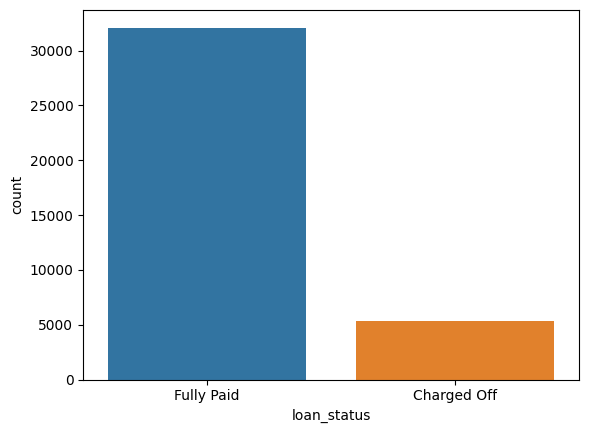

In [64]:
sns.countplot(x=cleaned_loan_data['loan_status'] )
plt.show()

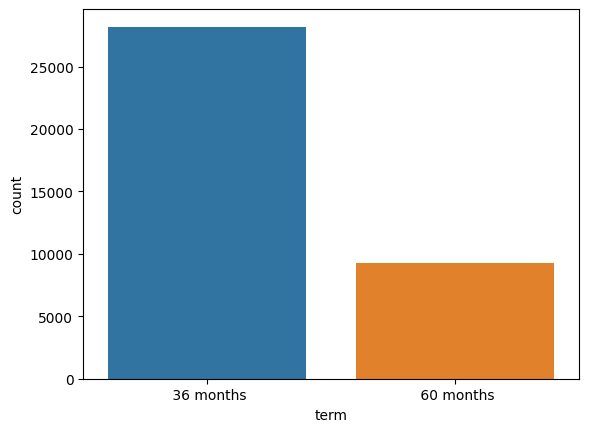

In [65]:
sns.countplot(x=cleaned_loan_data['term'] )
plt.show()

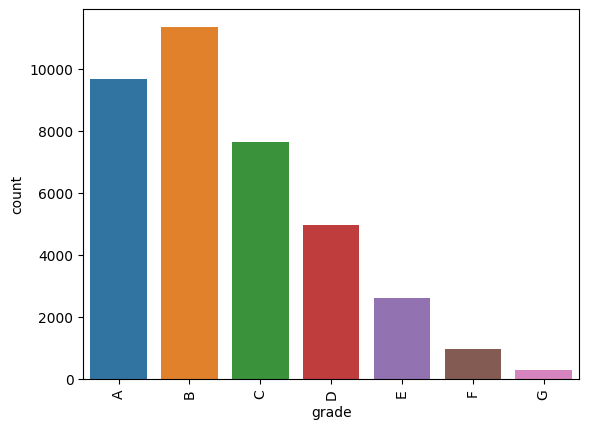

In [66]:
sns.countplot(x=cleaned_loan_data['grade'].sort_values())
plt.xticks(rotation=90)
plt.show()

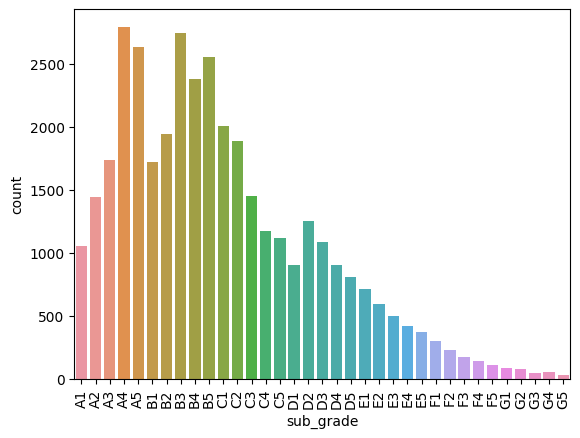

In [67]:
sns.countplot(x=cleaned_loan_data['sub_grade'].sort_values())
plt.xticks(rotation=90)
plt.show()

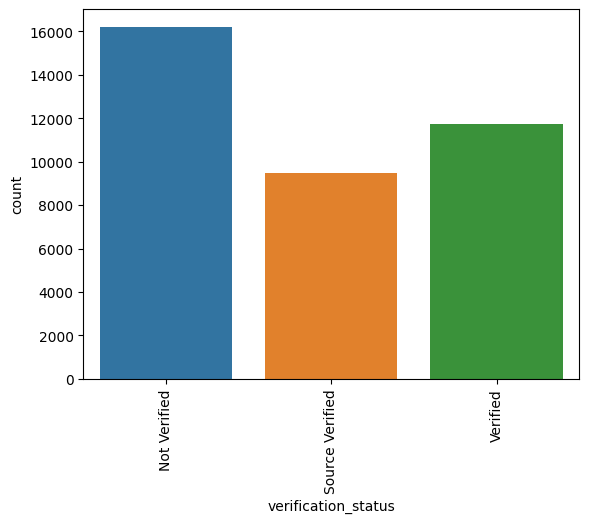

In [68]:
sns.countplot(x=cleaned_loan_data['verification_status'].sort_values())
plt.xticks(rotation=90)
plt.show()

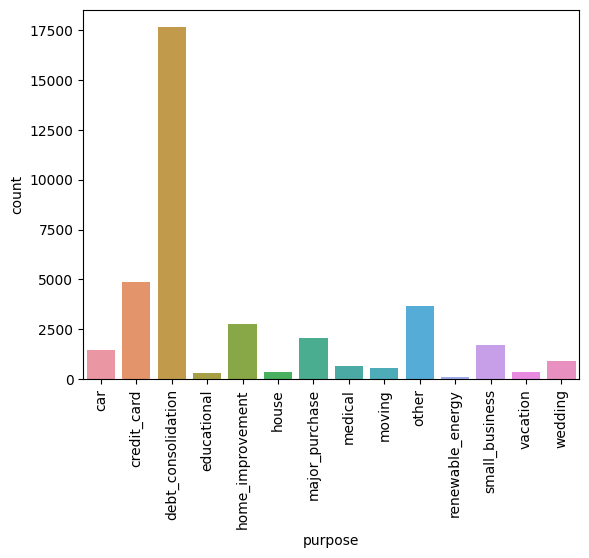

In [69]:
sns.countplot(x=cleaned_loan_data['purpose'].sort_values())
plt.xticks(rotation=90)
plt.show()

### Now let's plot some graphs & do some univariate analysis on numerical variables

In [70]:
num_vars_int = list(cleaned_loan_data.loc[:,cleaned_loan_data.dtypes=='int64'].columns)
num_vars_float = list(cleaned_loan_data.loc[:,cleaned_loan_data.dtypes=='float64'].columns)
num_vars = num_vars_int+ num_vars_float
num_vars

['loan_amnt',
 'emp_length',
 'open_acc',
 'total_acc',
 'loan_status_num',
 'month',
 'year',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'dti']

In [71]:
cleaned_loan_data.loc[:,num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37423 entries, 0 to 37422
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        37423 non-null  int64  
 1   emp_length       37423 non-null  int64  
 2   open_acc         37423 non-null  int64  
 3   total_acc        37423 non-null  int64  
 4   loan_status_num  37423 non-null  int64  
 5   month            37423 non-null  int64  
 6   year             37423 non-null  int64  
 7   funded_amnt_inv  37423 non-null  float64
 8   int_rate         37423 non-null  float64
 9   annual_inc       37423 non-null  float64
 10  dti              37423 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.1 MB


<Axes: xlabel='loan_amnt', ylabel='Count'>

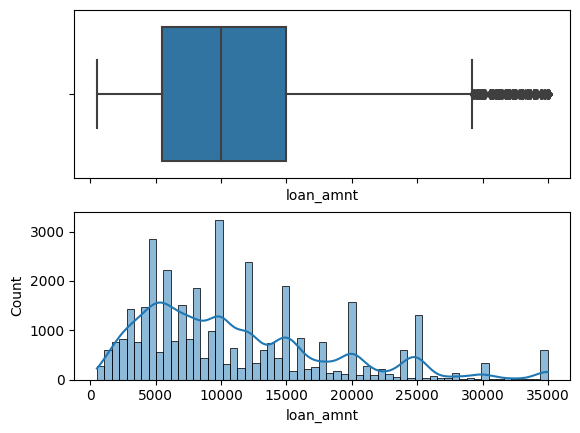

In [72]:
f, ax_types= plt.subplots(nrows = 2, sharex=True) #gridspec_kw={"height_ratios": (.15, .85)}
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x=cleaned_loan_data["loan_amnt"])
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x=cleaned_loan_data["loan_amnt"],kde=True)
 
# Remove x axis name for the boxplot
# ax_box.set(xlabel='')

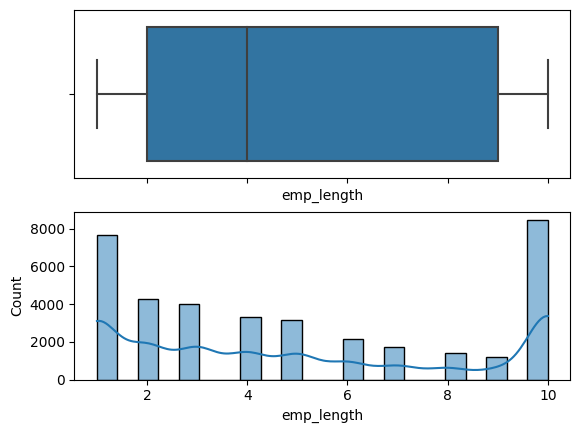

In [74]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="emp_length")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="emp_length",kde=True)
plt.show()

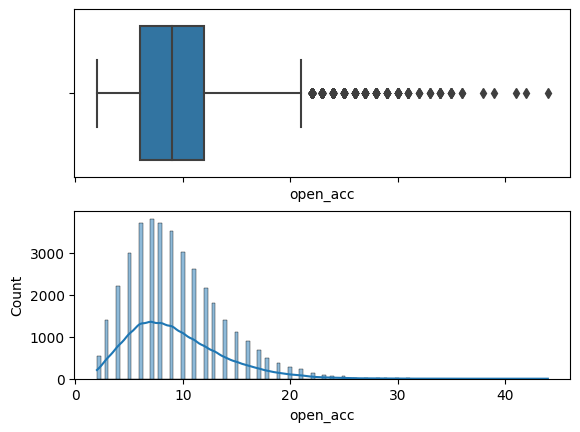

In [75]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="open_acc")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="open_acc",kde=True)
plt.show()

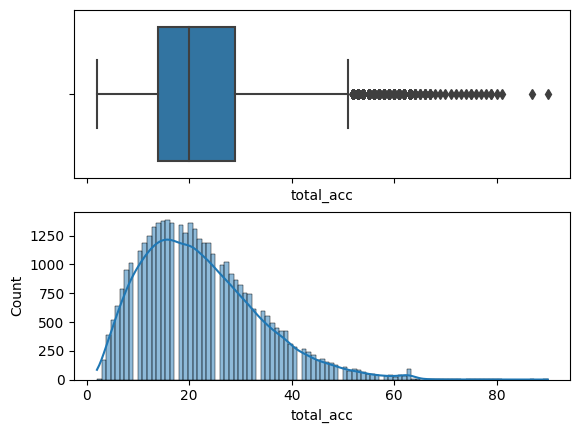

In [76]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="total_acc")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="total_acc",kde=True)
plt.show()

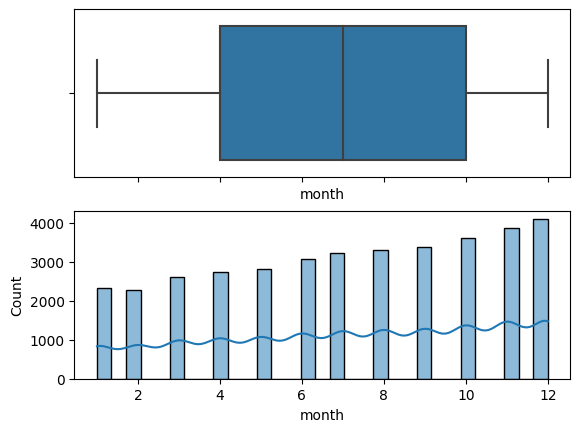

In [77]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="month")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="month",kde=True)
plt.show()

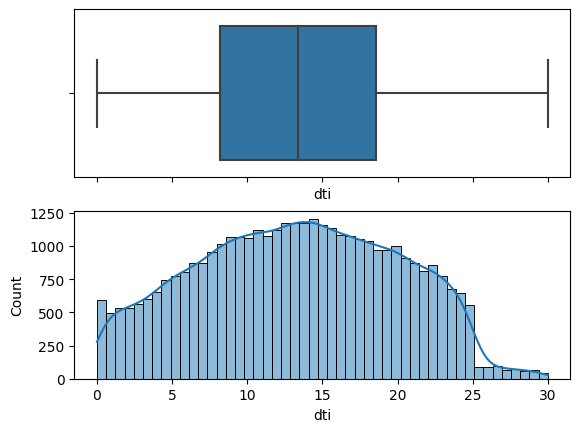

In [78]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="dti")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="dti",kde=True)
plt.show()

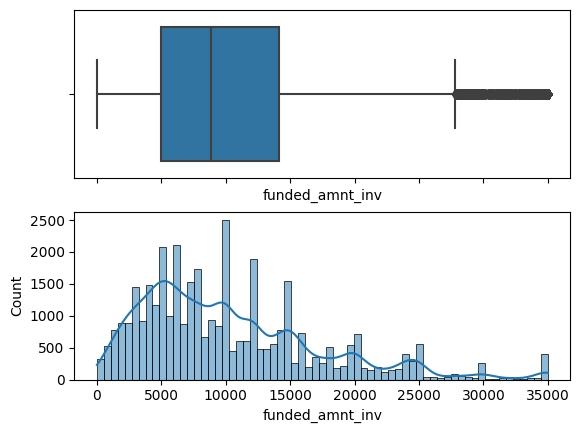

In [79]:
f, ax_types= plt.subplots(nrows = 2, sharex=True)
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x="funded_amnt_inv")
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x="funded_amnt_inv",kde=True)
plt.show()

<Axes: xlabel='annual_inc', ylabel='Count'>

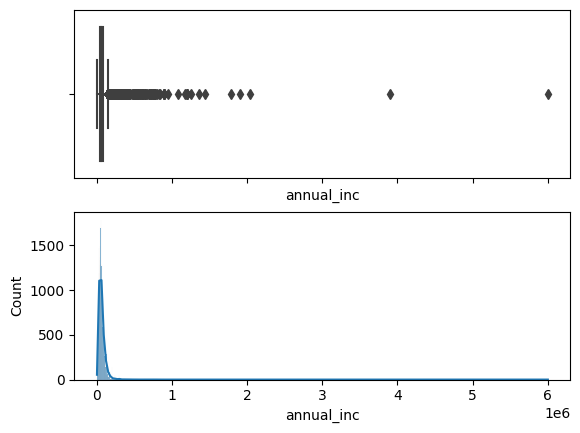

In [80]:
f, ax_types= plt.subplots(nrows = 2, sharex=True) #gridspec_kw={"height_ratios": (.15, .85)}
 
# Add a graph in each part
sns.boxplot(data=cleaned_loan_data, ax=ax_types[0], x=cleaned_loan_data["annual_inc"])
sns.histplot(data=cleaned_loan_data, ax=ax_types[1], x=cleaned_loan_data["annual_inc"],kde=True)
 
# Remove x axis name for the boxplot
# ax_box.set(xlabel='')

In [81]:
#We can see from the above plots that there are some outliers which have to be removed
print(cleaned_loan_data['annual_inc'].quantile(q=0.95))
cleaned_loan_data['annual_inc'].describe()

142000.0


count    3.742300e+04
mean     6.947194e+04
std      6.472035e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

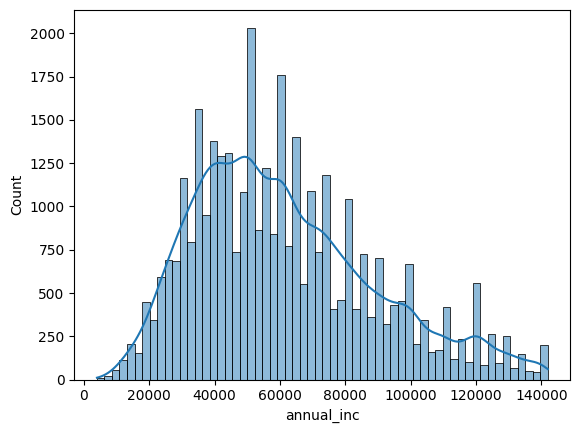

In [82]:
sns.histplot(data=cleaned_loan_data[cleaned_loan_data['annual_inc'] <142000 ] , x='annual_inc',kde=True)
plt.show()

In [83]:
outliers_removed=cleaned_loan_data[cleaned_loan_data['annual_inc'] <142000 ]
outliers_removed.reset_index(inplace=True, drop=True)
outliers_removed.head()
# sns.histplot(data=outliers_removed , x=outliers_removed['annual_inc'],kde=True)
# plt.show()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,total_acc,loan_status_num,month,year
0,5000,4975.0,36 months,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,3,9,0,12,2011
1,2500,2500.0,60 months,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,3,4,1,12,2011
2,2400,2400.0,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,10,0,12,2011
3,10000,10000.0,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,10,37,0,12,2011
4,5000,5000.0,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,9,12,0,12,2011


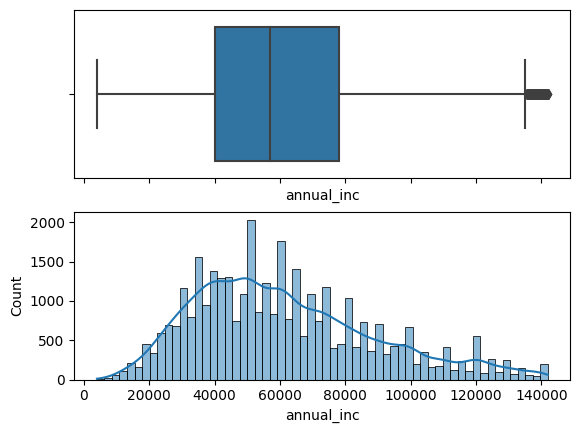

In [84]:
f, ax_types= plt.subplots(nrows = 2, sharex=True) #gridspec_kw={"height_ratios": (.15, .85)}
 
# Add a graph in each part
sns.boxplot(data=outliers_removed, ax=ax_types[0], x="annual_inc")
sns.histplot(data=outliers_removed, ax=ax_types[1], x="annual_inc",kde=True)
plt.show()

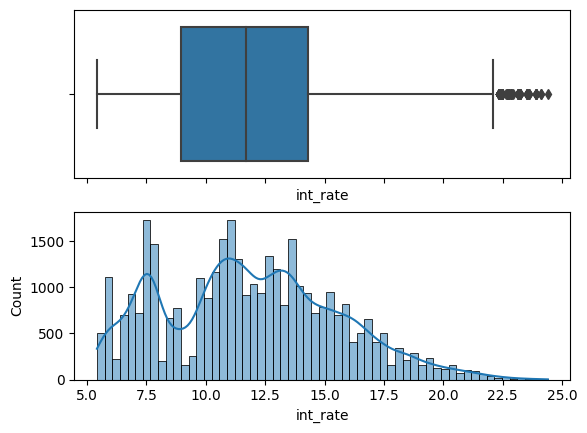

In [85]:
f, ax_types= plt.subplots(nrows = 2, sharex=True) #gridspec_kw={"height_ratios": (.15, .85)}
 
# Add a graph in each part
sns.boxplot(data=outliers_removed, ax=ax_types[0], x="int_rate")
sns.histplot(data=outliers_removed, ax=ax_types[1], x="int_rate",kde=True)
plt.show()

In [86]:
outliers_removed.loc[:,num_vars].describe()

,loan_amnt,emp_length,open_acc,total_acc,loan_status_num,month,year,funded_amnt_inv,int_rate,annual_inc,dti
count,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000,35543.000000
mean,10761.706947,5.025828,9.198182,21.693132,0.143938,7.107053,2010.298540,9961.216616,11.910401,61483.127361,13.465638
std,7049.962523,3.391336,4.345536,11.218308,0.351032,3.413751,0.887378,6739.025341,3.657005,27726.606419,6.646926
min,500.000000,1.000000,2.000000,2.000000,0.000000,1.000000,2007.000000,0.000000,5.420000,4000.000000,0.000000
25%,5100.000000,2.000000,6.000000,13.000000,0.000000,4.000000,2010.000000,5000.000000,8.940000,40000.000000,8.380000
50%,9500.000000,4.000000,8.000000,20.000000,0.000000,7.000000,2011.000000,8450.000000,11.710000,57000.000000,13.600000
75%,15000.000000,9.000000,12.000000,28.000000,0.000000,10.000000,2011.000000,13750.000000,14.300000,78000.000000,18.710000
max,35000.000000,10.000000,44.000000,90.000000,1.000000,12.000000,2011.000000,35000.000000,24.400000,141996.000000,29.990000


# Bivariate Analysis
We have plotted graphs for most variables to get a rough idea on how the data is distributed and if the data has high outliers we have also removed them by easily looking at the graphs.

This is mostly the purpose of the univariate analysis for our case-study.
For our case-study we would be able to derive more inferences once we start to compare these variables against the target variable i.e., by doing a Bi-variate Analysis.

Three ways in which a Bivariate analysis can be done
1. Numerical - Numerical     - scatter plots, correlation matrix, pairplots
2. Numerical - Categorical   - Grouped box plots, Bar plots, violin plots
3. Categorical - Categorical - Pivot table, Crosstab

For all numerical categories we can plot a pairplot which would give us the relationship between those variables, but wouldn't contribute much to our analysis in our case-study.

We can plot a heatmap to see the correlation between each of those numeric variables and we can exclude those with high correlation to make our initial analysis. We have already done this kind of analysis before in this sheet to remove the unnecessary rows.

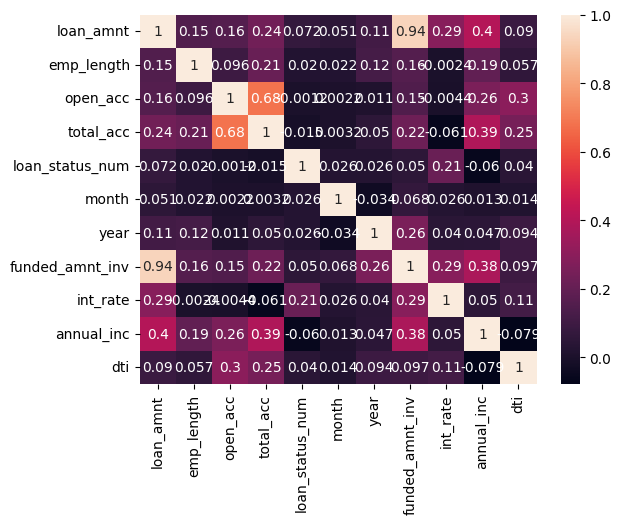

In [87]:
sns.heatmap(outliers_removed.loc[:,num_vars].corr(),annot=True)
plt.show()
#as said we have only two variables which are highly correlated and that too was kept by purpose

In [88]:
#plot barplot for categorical and quantitative variables
def bar_plot_uni_avg_rate(cat,ax,xtickrotation_angle):
    #Prepare a sub_frame from just the 2 desired variables, this is done in order to sort the variables
    data1 = outliers_removed.loc[:,[cat,'loan_status_num']].sort_values(['loan_status_num',cat])
        
    #plot the Bar Graph
    title_str = "\nDistribution - "+cat+"\n"
    sns.barplot(x=cat, y='loan_status_num', data=data1,ax=ax).set_title(title_str,fontdict={'size': 12, 'weight' : 'bold', 'color' : 'Black'})

    # Labeling Axesz
    ax.set_xlabel(cat, fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
    ax.set_ylabel("Default Rate\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'}) 
    
    ax.tick_params('x', labelrotation=xtickrotation_angle)

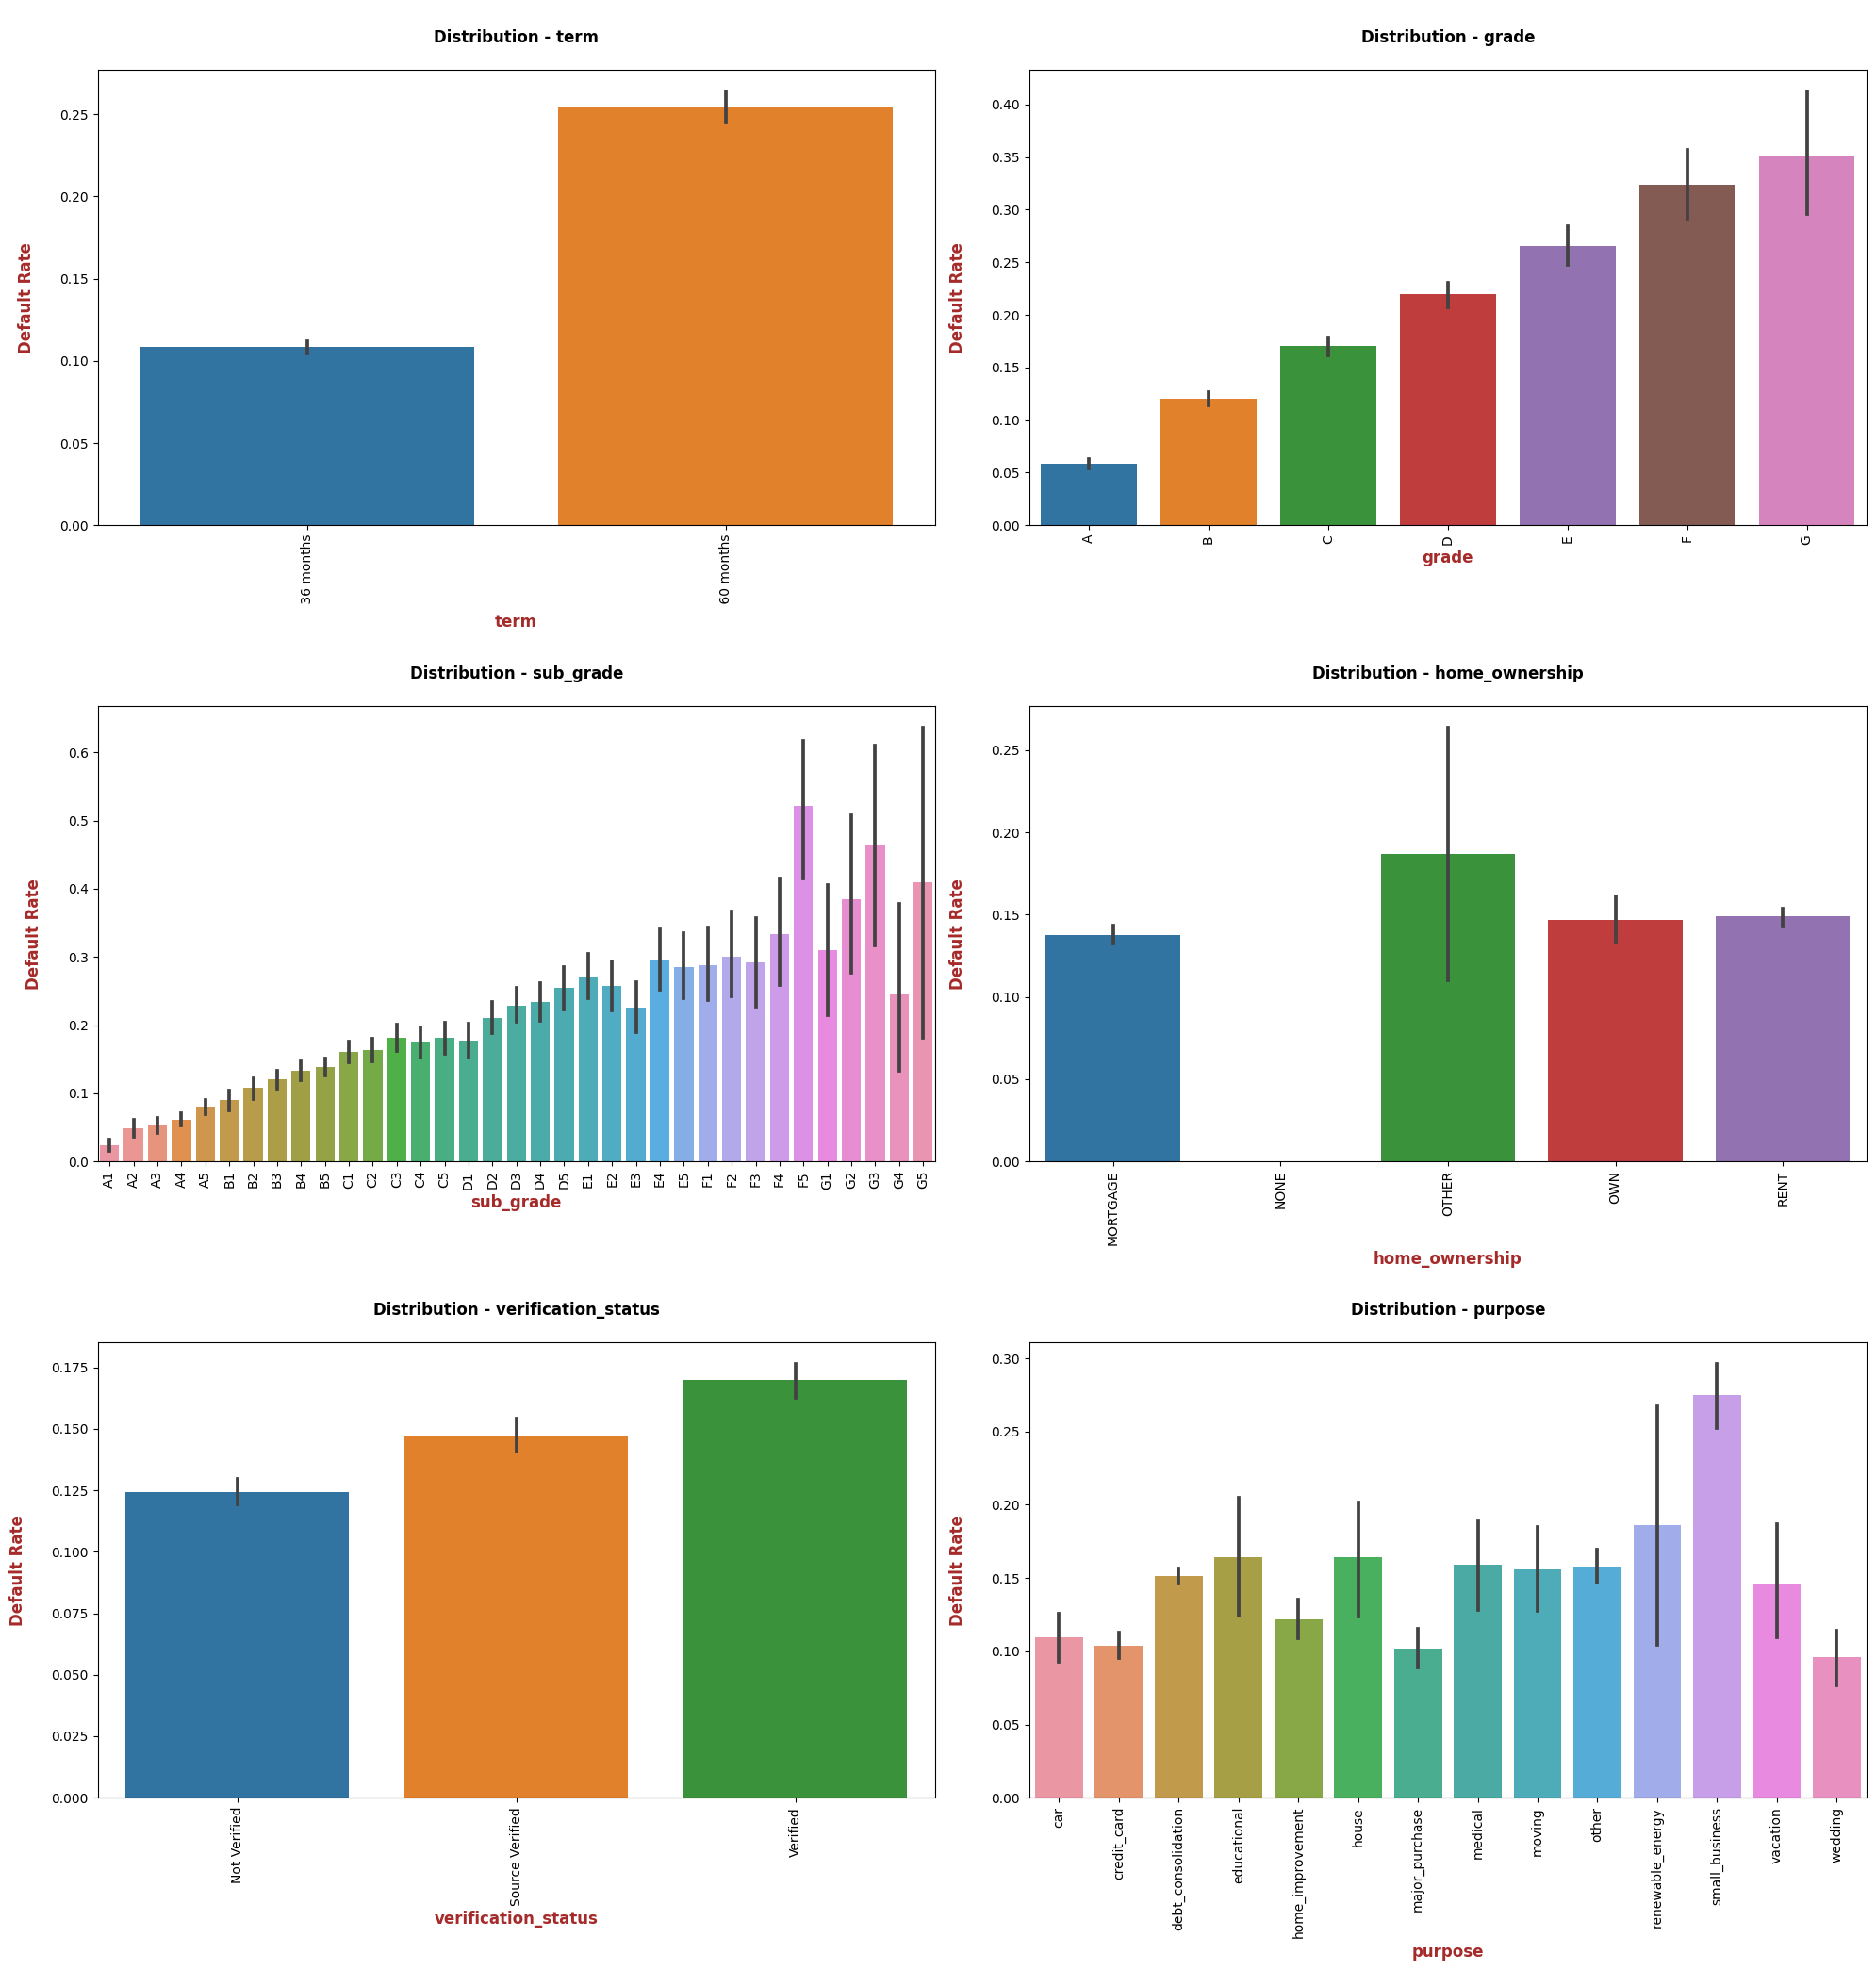

In [89]:
#define the rows and columns
nr_rows = 3
nr_cols = 2

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*7))

#loop through the numeric columns to identify the outliers
loop_vars =  [x for x in cat_vars if x not in ['loan_status']]
# for r in range (0,len(cat_vars))
    
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_vars):
#             bar_plot_uni_avg_rate('grade',axs[0][2])
#             bar_plot_uni_avg_rate('term',axs[0][1])
            bar_plot_uni_avg_rate(loop_vars[i],axs[r][c],90)
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
#             sns.boxplot(x='loan_status', y=num_cols[i], data=final_loan_df, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

__Inferences__:
1. Rate of defaulters is higher for 60 months than compared to 36 Months. That means we can say that the as the term increases the number of defaulters are also increasing.
2. From the graph Grade vs Default Rate, it can be observed that the Grade __G__ people are more likely to default than Grade __A__ people. And the default rate is also increasing from Grades A to G
3. Similar pattern as the Grade is observed in sub-grade category vs defaulters rate. The trend of defaulters is increasing from sub_grade __A1__ to __G5__ with minor exceptions.
4. From above plot for ‘home_ownership’ we can infer that the defaulters' rate is more or less constant here. It is quite more for OTHERS, hence default rate will depend on home ownership if it is of type OTHER or not.
5. Suprisingly, in the plot for 'verification_status' we observed that people whose status is __verified__ and __source verified__ are more prone to default than people with 'not verified' status
6. And at last from the purpose distribution we observe that the people taking loan for the purpose of __small_business__ are more likely to default than other purposes. 

We have made inferences for the categorical variables based on the plots.<br>
Easiest way to analyze the defaulters_rate across continuous variables like loan_amount, int_rate, etc is to bin them into discrete categorical variables

Let's start with the loan_amount

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
print(cleaned_loan_data['annual_inc'].quantile(q=0.90))
outliers_removed.loan_amnt.describe()

117000.0


count    35543.000000
mean     10761.706947
std       7049.962523
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [92]:
# binning the loan_amount and funded_amnt_inv with the same function because both of them have almost similar distribution 
# as observed in the above analysis and also they have a very high correlation value.
def loan_amount(x):
    if x <5100:
        return 'low'
    elif x>=5100 and x<15000:
        return 'medium'
    elif x>=15000 and x <117000:
        return 'high'
    else:
        return 'very high'
    
outliers_removed['loan_amount_bin'] = outliers_removed['loan_amnt'].apply(lambda x: loan_amount(x))
outliers_removed['funded_amnt_inv_bin'] = outliers_removed['funded_amnt_inv'].apply(lambda x: loan_amount(x))

In [93]:
# now lets also convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
outliers_removed['int_rate_bin'] = outliers_removed['int_rate'].apply(lambda x: int_rate(x))

In [94]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

outliers_removed['dti_bin'] = outliers_removed['dti'].apply(lambda x: dti(x))

In [95]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

outliers_removed['annual_inc_bin'] = outliers_removed['annual_inc'].apply(lambda x: annual_income(x))

In [96]:
# employment length = number of years a person is employed at the time of loan application

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

outliers_removed['emp_length_bin'] = outliers_removed['emp_length'].apply(lambda x: emp_length(x))

Lets plot some graphs for these newly derived bin variables against defaulters rate

In [97]:
loop_vars = ['emp_length_bin','annual_inc_bin','dti_bin','int_rate_bin','funded_amnt_inv_bin','loan_amount_bin']

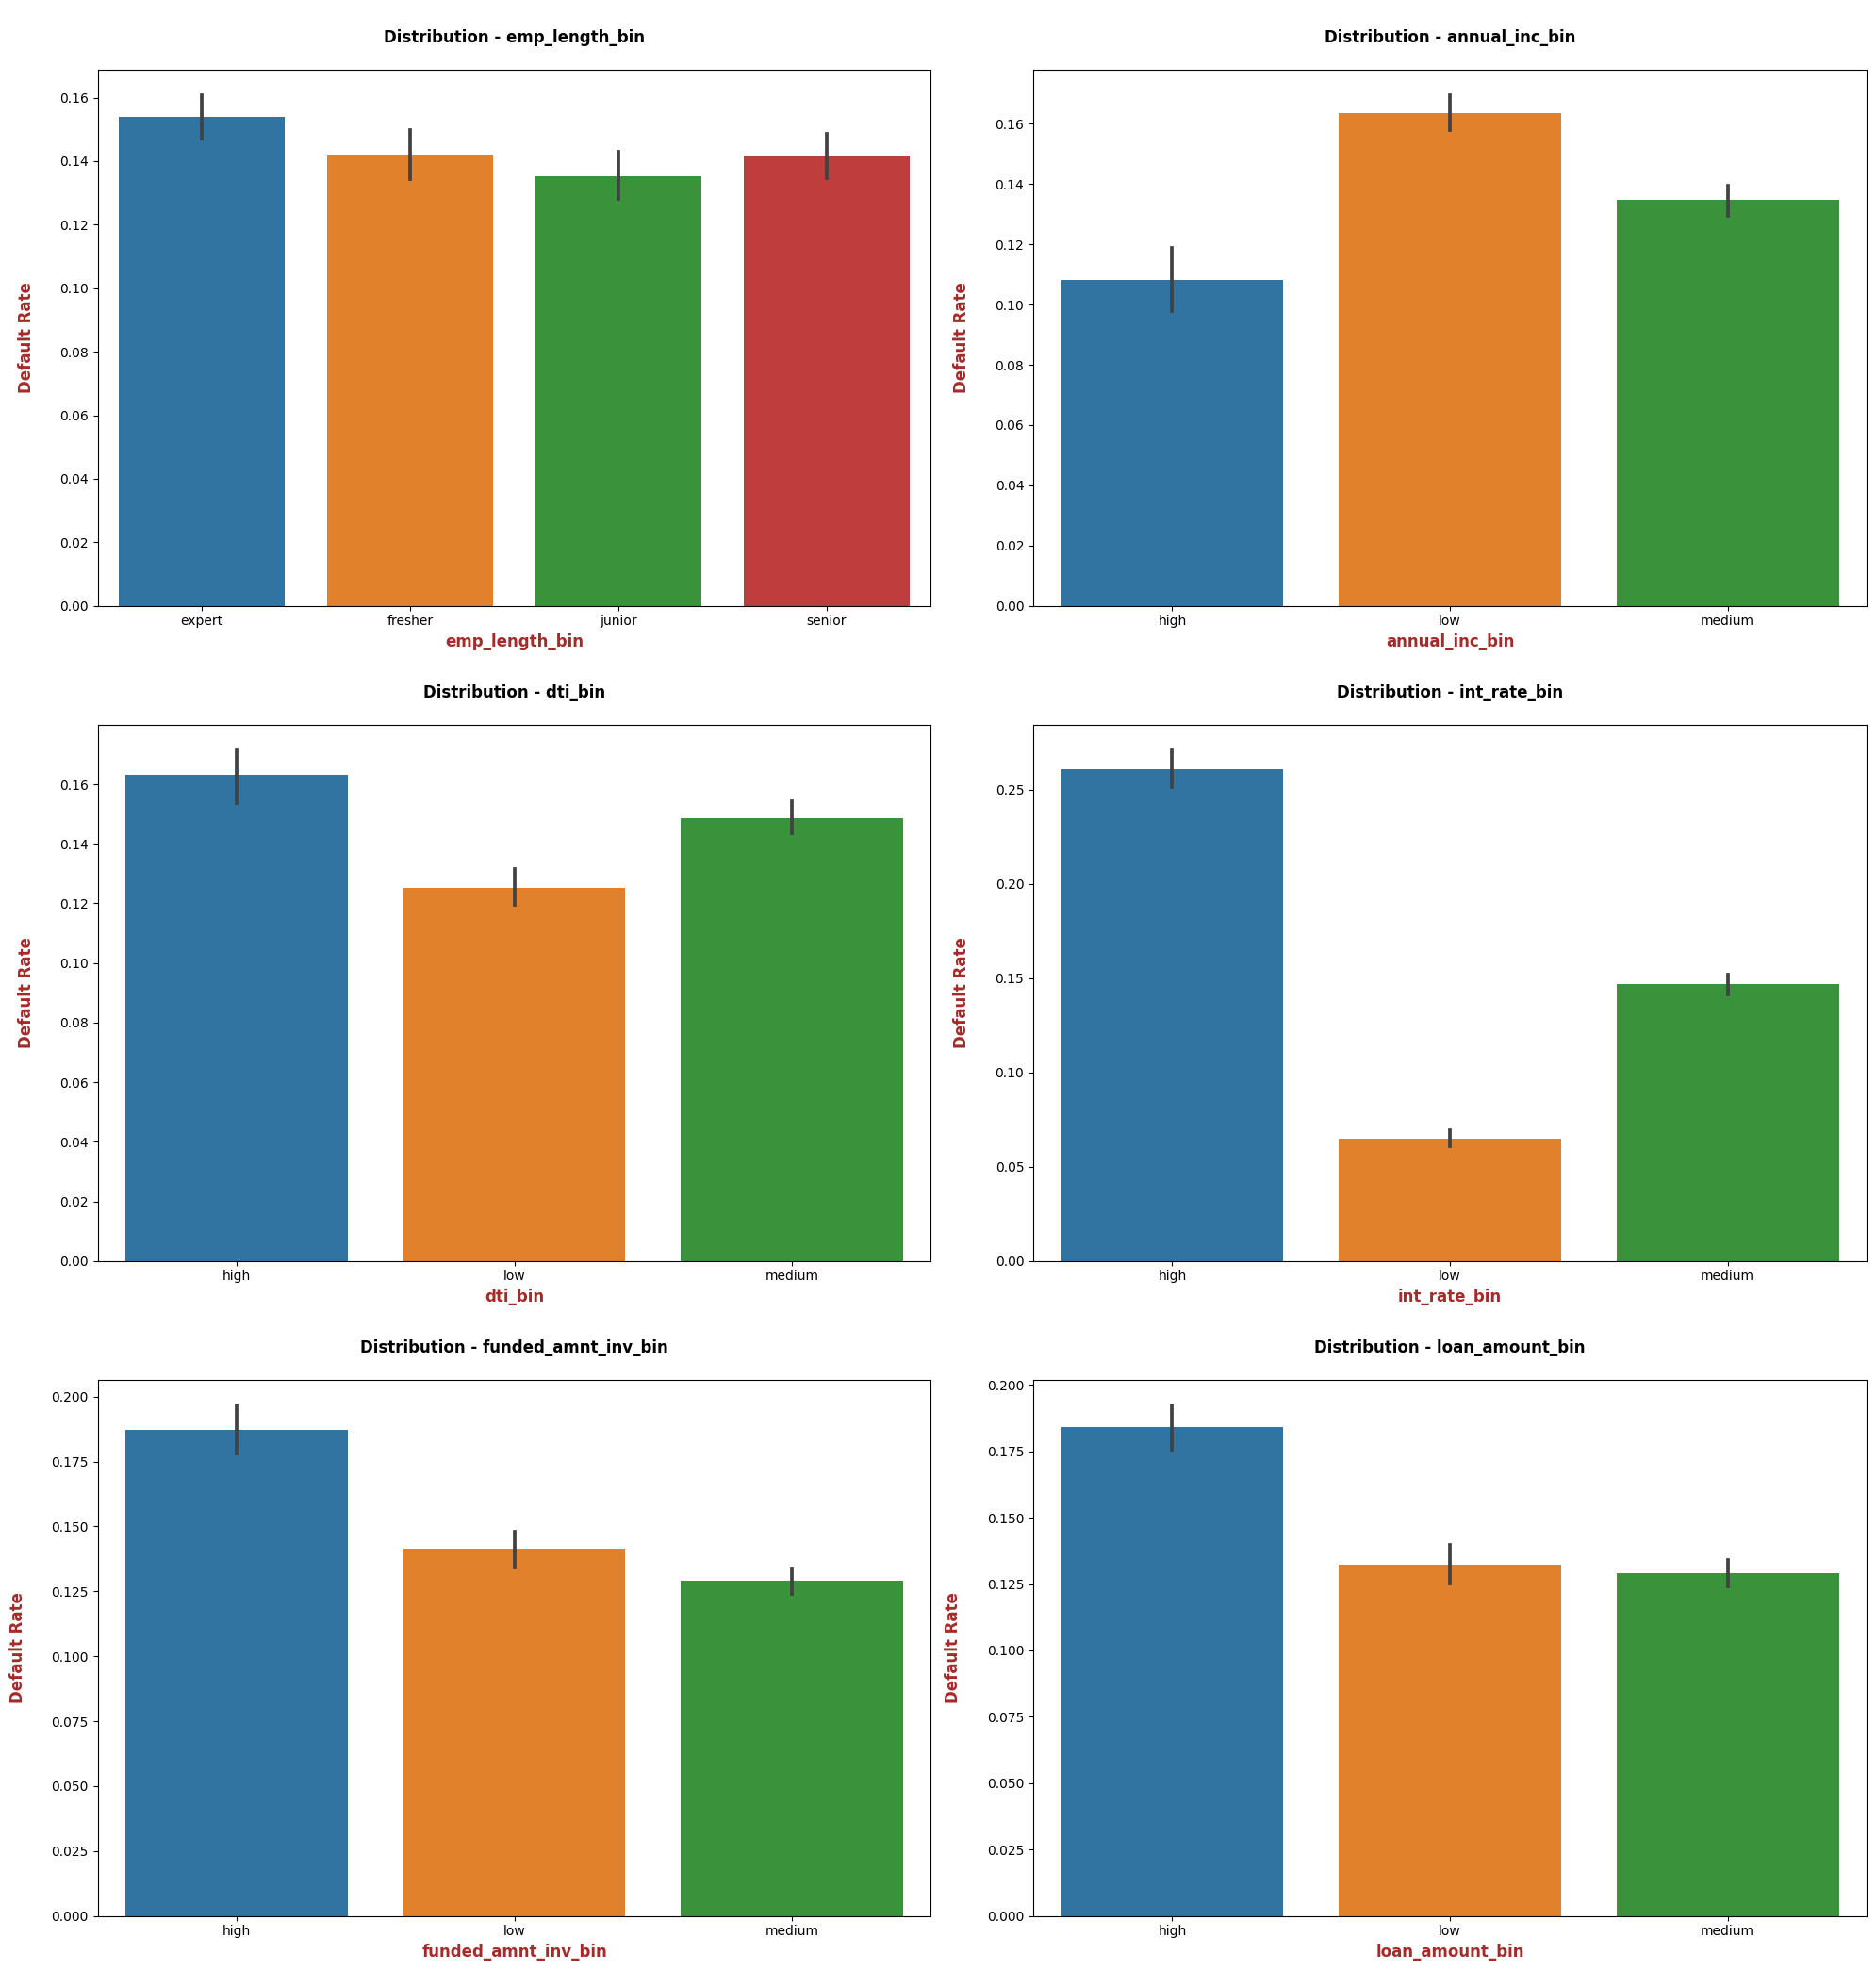

In [98]:
#define the rows and columns
nr_rows = 3
nr_cols = 2

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*7))
    
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_vars):
            bar_plot_uni_avg_rate(loop_vars[i],axs[r][c],0)

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

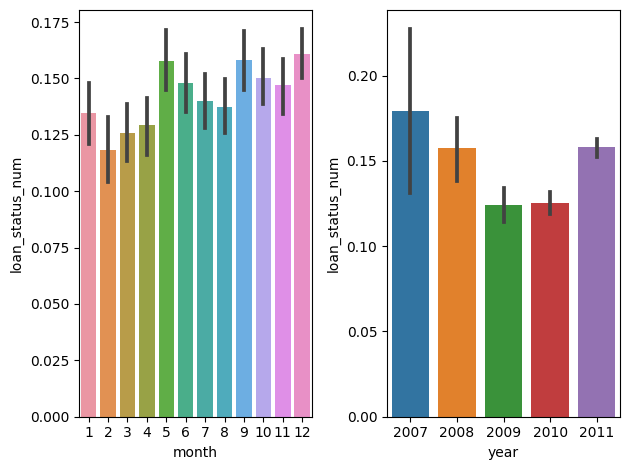

In [99]:
#Months and Years are not continuous and are already binned so plotting them seperately

fig, axs = plt.subplots(ncols=2)
data1 = outliers_removed.loc[:,['month','loan_status_num']].sort_values(['loan_status_num','month'])
sns.barplot(x='month', y='loan_status_num', data=data1,ax=axs[0]) 

data1 = outliers_removed.loc[:,['year','loan_status_num']].sort_values(['loan_status_num','year'])
sns.barplot(x='year', y='loan_status_num', data=data1,ax=axs[1]) 

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

__Inferences__/__Conclusions__ :
1. emp_length has negligible affect on the defaulting rate.
2. annual_inc has some affect on the defaulting rate. As expected, if the persons income is less he is more prone to default as compared against a high income person.
3. As expected again, if the loan takers dti (debt to income ratio) is less then he is more likely to payoff the loan.
4. Significant jump is seen in loan takers whose interest rate is less vs high. That means if that persons interest rate is low, then he is more likely to payoff the loan. And a person having a high interest rate is likely to default on their loan
5. & 6. People with lesser loan size i.e., who take a loan of relatively smaller value are more likely to payoff their loan.
7. There is no particular trend to the month vs default rate but the loans taken in the months of 5,9,12 i.e., May, September and December have more default rate.
8. There is a clear drop in the loan default rates from years 2007 until 2010 and in 2011 there is a sharp spike in the defaulters rate.

#### Conclusion of the above Analysis:
We have observed significant impact on default rate for the following variables
1. term
2. grade
3. annual_inc
4. int_rate
5. purpose
6. home_ownership
7. funded_amnt_inv
8. annual_inc
9. dti - debt to income ratio

Until now we have compared the default rates across various variables and found out some key factors which influence it like 
purpose of the loan (__purpose__), interest rates (__int_rate__), annual income (__annual_inc__), grade assigned by LC (__grade__), term/duration/period of loan (__term__) etc...

Let's try to figure out which variables we want to group on. Otherwise it will be illogical.
<br>
<br>
In the credit industry, one of the most important factors affecting defaulters rate is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.
<br>
<br>
This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

In [100]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var,data,**kwargs):
    if kwargs.get('ax',None) == None:
        sns.barplot(x=cat_var, y='loan_status_num', data=data)
    else:
        sns.barplot(x=cat_var, y='loan_status_num', data=data, ax=kwargs.get('ax'))

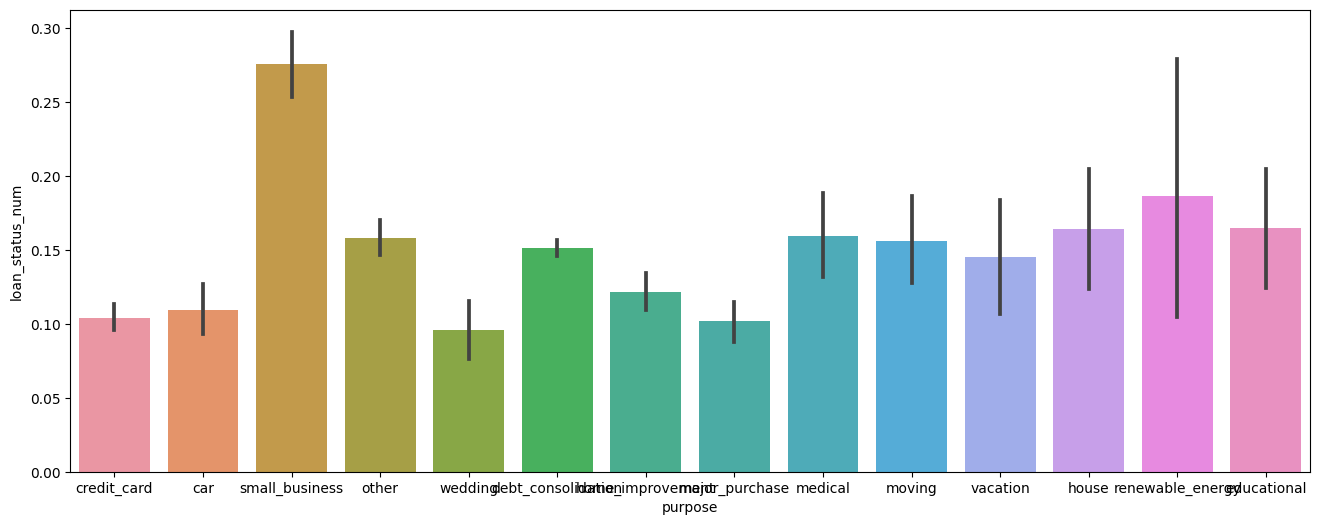

In [101]:
plt.figure(figsize=(16,6))
plot_cat('purpose',outliers_removed)
# plt.xticks(rotation=90)
plt.show()

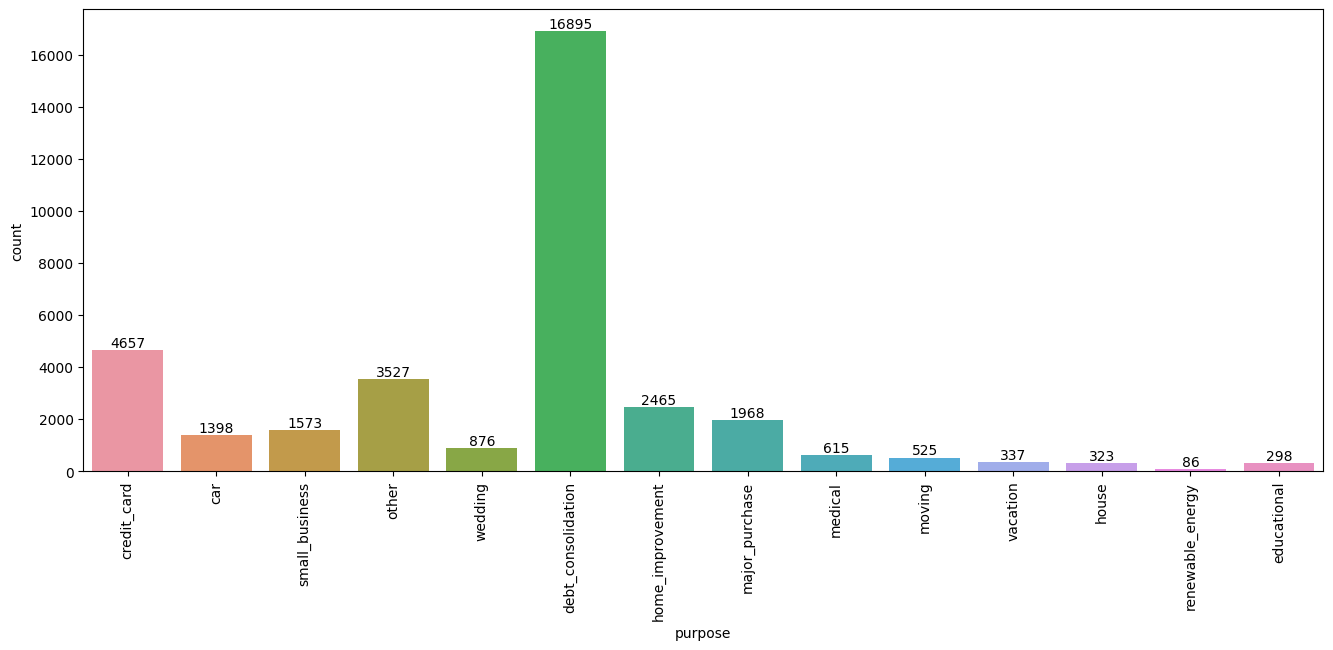

In [102]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='purpose', data=outliers_removed)
ax.bar_label(ax.containers[-1], label_type='edge')
plt.xticks(rotation=90)
plt.show()

From the figure above top 5 types of loans based on purpose: debt_consolidation, credit_card, home_improvement and major_purchase.
<br>
<br>
Now let's compare the default rates across two types of categorical variables

In [112]:
top_five_purpopses = ["credit_card","debt_consolidation","home_improvement","major_purchase",'small_business']
loan_df_pur_subset = outliers_removed[outliers_removed['purpose'].isin(top_five_purpopses)]
loan_df_pur_subset['purpose'].value_counts()

purpose
debt_consolidation    16895
credit_card            4657
home_improvement       2465
major_purchase         1968
small_business         1573
Name: count, dtype: int64

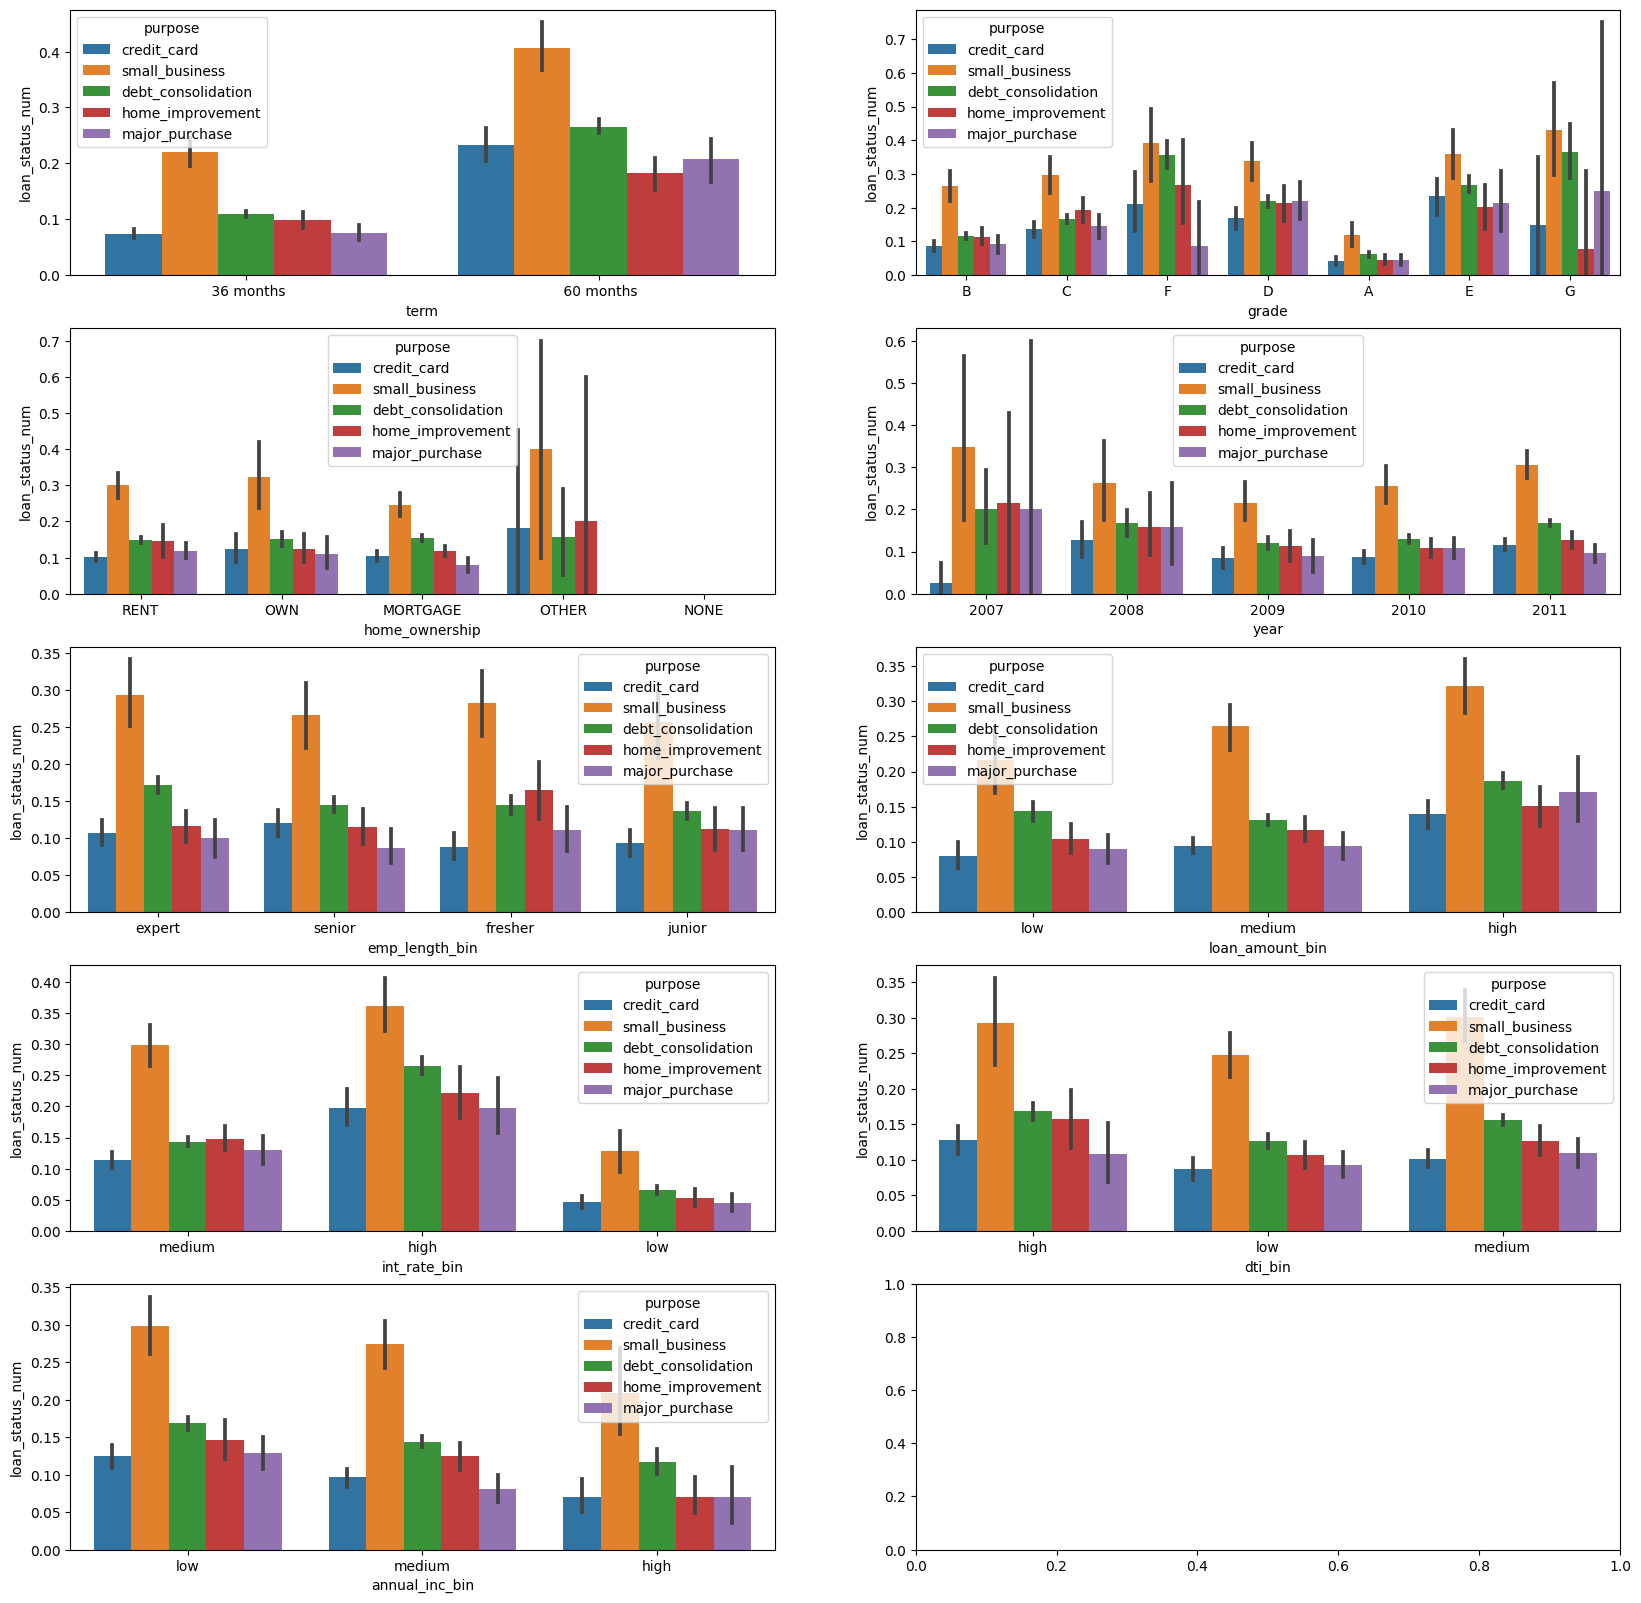

In [111]:
# purpose of loan (constant) and another categorical variable (which changes)
# lets figure a function for this purpose
# In this function y variable will be fixed to loan_status_num which means the defaulters rate
# and hue = which refers to the segmentation of the purpose
def segmented_cat_pur_plot(cat_var,data,axs):
    a = sns.barplot(x=cat_var, y="loan_status_num", hue='purpose', data=data,ax=axs)

fig, axs = plt.subplots(ncols=2,nrows=5,figsize=(20,20))
segmented_cat_pur_plot('term',loan_df_pur_subset,axs[0][0])
segmented_cat_pur_plot('grade',loan_df_pur_subset,axs[0][1])
segmented_cat_pur_plot('home_ownership',loan_df_pur_subset,axs[1][0])
segmented_cat_pur_plot('year',loan_df_pur_subset,axs[1][1])
segmented_cat_pur_plot('emp_length_bin',loan_df_pur_subset,axs[2][0])
segmented_cat_pur_plot('loan_amount_bin',loan_df_pur_subset,axs[2][1])
segmented_cat_pur_plot('int_rate_bin',loan_df_pur_subset,axs[3][0])
segmented_cat_pur_plot('dti_bin',loan_df_pur_subset,axs[3][1])
segmented_cat_pur_plot('annual_inc_bin',loan_df_pur_subset,axs[4][0])
# segmented_cat_pur_plot('grade',loan_df_pur_subset,axs[4][1])
plt.show()

In [105]:
outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35543 entries, 0 to 35542
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            35543 non-null  int64         
 1   funded_amnt_inv      35543 non-null  float64       
 2   term                 35543 non-null  object        
 3   int_rate             35543 non-null  float64       
 4   grade                35543 non-null  object        
 5   sub_grade            35543 non-null  object        
 6   emp_length           35543 non-null  int64         
 7   home_ownership       35543 non-null  object        
 8   annual_inc           35543 non-null  float64       
 9   verification_status  35543 non-null  object        
 10  issue_d              35543 non-null  datetime64[ns]
 11  loan_status          35543 non-null  object        
 12  purpose              35543 non-null  object        
 13  dti                  35543 non-

__Inferences__
1. Although the number of loans taken for small business purposes are comparitively lesser, but the probability of those loans to be defaulted is much higher than loans taken for any other purposes. In each and every plot irrespective of the other category, we observed this general trend.
2. As observed before and also in this graph of int_rate vs loan_status grouped on purpose, the risk of defaulting increases with the interest rate increase and also interesting thing to observe is that small_business, renewable energy, educational and house loans also tend to default more as the int_rate increases.

#### Categorical-Categorical variables -> Pivot Tables

categorical variables are ['term','grade','home_ownership','verification_status','loan_status']

In [106]:
pd.pivot_table(data=outliers_removed, index='grade',columns=['term'], values='loan_status_num',aggfunc=np.sum)

term,36 months,60 months
grade,,
A,509,35
B,885,410
C,771,470
D,531,502
E,147,486
F,43,237
G,19,71


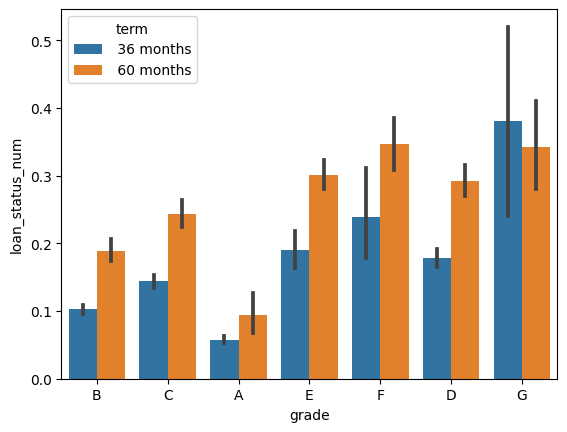

In [107]:
sns.barplot(x='grade', y="loan_status_num", hue='term', data=outliers_removed)
plt.show()

Inference drawn - 

From the before analysis we found out that as the Grade increased, the default rate increased. 
But now from the just before analysis we could see that in all the grades except from G there is definite distinction between people with tenure is 36 & 60 months. At each grade, people with less loan tenure/period are less likely to default.

As we can see the same pivot_table data is expressed better in the Grouped Bar plots.

Lets try to form some more plots which might give us better results based on the knowledge we gained until now

__S.No - X variable - Y Variable - hue/group by__
1. Annual income bin - loan_status_num - interest rate
2. home ownership - loan_status_num - interest rate
3. verification status - loan_status_num - interest rate
4. annual income bin - loan_status_num - dti
5. home ownership - loan_status_num -dti
6. month - loan_status_num - year

In [108]:
def grouped_bar_plot(x,hue,axs):
    sns.barplot(x=x, y="loan_status_num", hue=hue, data=outliers_removed,ax=axs)

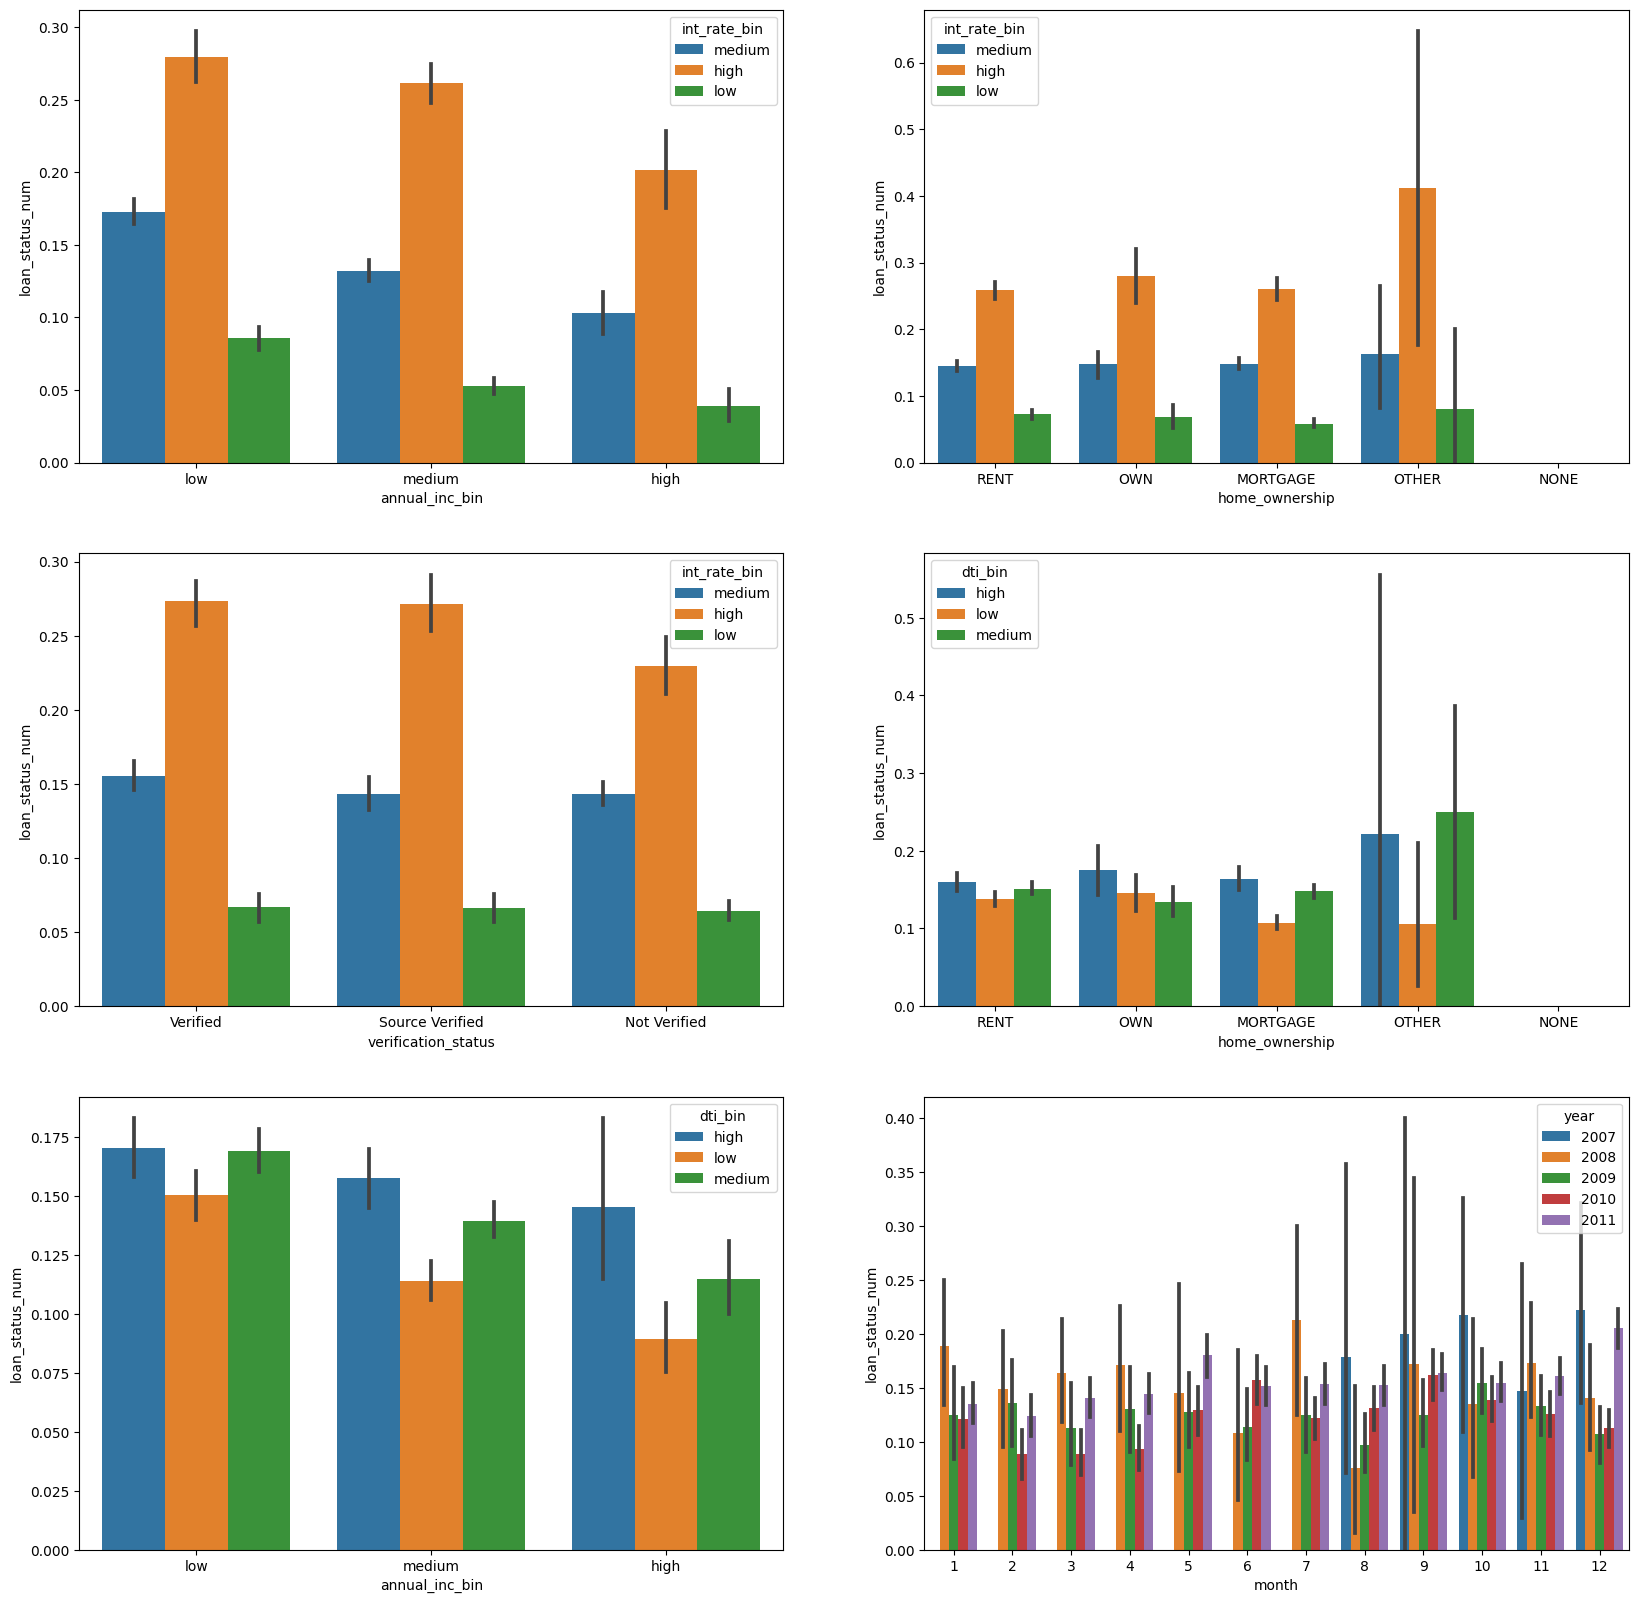

In [109]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
grouped_bar_plot('annual_inc_bin','int_rate_bin',axs[0][0])
grouped_bar_plot('home_ownership','int_rate_bin',axs[0][1])
grouped_bar_plot('verification_status','int_rate_bin',axs[1][0])
grouped_bar_plot('home_ownership','dti_bin',axs[1][1])
grouped_bar_plot('annual_inc_bin','dti_bin',axs[2][0])
grouped_bar_plot('month','year',axs[2][1])
plt.show()

Since the possibilites of such combinations are unlimited, we would constraint ourselves with the analysis done until now and try to build some inferences. If we needed we can plot again some more graphs to get more inferences as required

1. From plot annual_inc_bin vs loan_status_num we can observe a linear relation between annual income , debt to income and default status. That means as the annual income of person given loan falls into the high range category and their dti (debt to income ratio) is low then that person is very unlikely to default and their defaulting risk increases as their dti increases or their annual income decreases.
2. From the plot month vs loan_status, we previously observed that during the months of May, September and December the default risk is higher. But now from this graph its observed that during the years 2007 & 2011 the default risk is higher in september and december than other months which is the cause for that spike we observed. 
3. Surprisingly one would expect a person with already some Mortgage in home_ownership would end up defaulting more but here the person belonging to other category in home_ownership having high risk of defaulting and also the persons in that other category belonging to a medium dti bin are prone to more risk (although very less) than person having high dti in the same category

By going through these graphs few other categorizations come into mind which we would like to analyze like the incomeVsmonthVsloanstatus & incomeVsyearVsloanstatus.

Lets plot these graphs two graphs

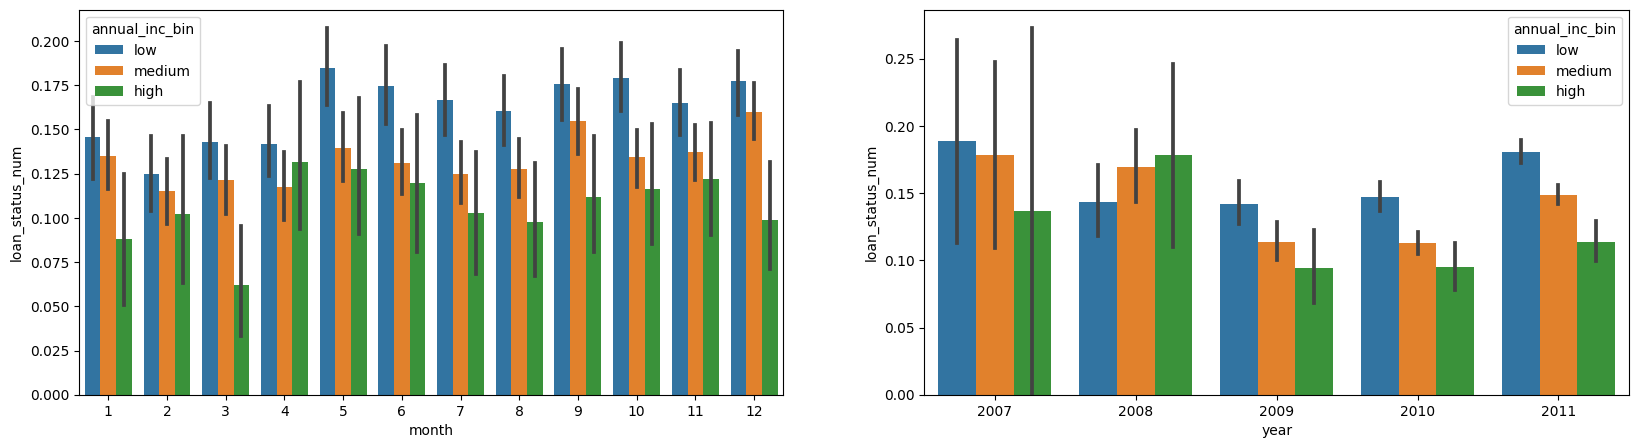

In [115]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,5))
grouped_bar_plot('month','annual_inc_bin',axs[0])
grouped_bar_plot('year','annual_inc_bin',axs[1])
plt.show()

No particular relationship is observed in these graphs which would've explained the sudden jump in the default rate in 2011

Another way of quantifying the effect of a categorical variable on default rate is to observe 'how does default rate vary across the categories'.

Let's see an example using annual_inc as the categorical variable.

In [118]:
outliers_removed.groupby('annual_inc_bin').loan_status_num.mean().sort_values(ascending=False)

annual_inc_bin
low       0.163595
medium    0.134728
high      0.108230
Name: loan_status_num, dtype: float64

In [123]:
#Apart from all the graphs another way of determing the affect of variables on the default risk is to take the difference
# between the highest and lowest categories.
# Note: This might not be as effective as deriving the inferences from graphs but it serves the purpose of quantifying the value.

def diff_rate(cat_var):
    default_rates = outliers_removed.groupby(cat_var).loan_status_num.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc_bin')
print("Default mean rates of ",default_rates) 
print(diff,"= is the difference of the highest and lowest mean default rates in the annual_inc_bin category")

Default mean rates of  annual_inc_bin
low       0.16
medium    0.13
high      0.11
Name: loan_status_num, dtype: float64
0.06 = is the difference of the highest and lowest mean default rates in the annual_inc_bin category


Now that we have covered almost of the possible outcomes and got to a point where we are deriving the same inferences again.

Let's look into the next part of concluding it.

# Recommendation & Conclusion

In [135]:
# Let's repeat the same for all other categorical variables 
# To do that we need to first fetch the categorical variables
categorical_vars_df= outliers_removed.loc[:,outliers_removed.dtypes == 'object']

#lets the add the target variable
categorical_vars_df['loan_status_num'] = outliers_removed['loan_status_num']
categorical_vars_df.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'loan_amount_bin', 'funded_amnt_inv_bin',
       'int_rate_bin', 'dti_bin', 'annual_inc_bin', 'emp_length_bin',
       'loan_status_num'],
      dtype='object')

In [138]:
def diff_rate(cat_var):
    default_rates = categorical_vars_df.groupby(cat_var).loan_status_num.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

for cols in categorical_vars.columns:
    if (cols!= 'loan_status_num') & (cols!= 'loan_status') :
        default_rates, diff = diff_rate(cols)
        print(diff,"= in the", cols ,"category, the difference of the highest and lowest mean default rates" )


0.15 = in the term category, the difference of the highest and lowest mean default rates
0.29 = in the grade category, the difference of the highest and lowest mean default rates
0.5 = in the sub_grade category, the difference of the highest and lowest mean default rates
0.19 = in the home_ownership category, the difference of the highest and lowest mean default rates
0.05 = in the verification_status category, the difference of the highest and lowest mean default rates
0.18 = in the purpose category, the difference of the highest and lowest mean default rates
0.06 = in the loan_amount_bin category, the difference of the highest and lowest mean default rates
0.06 = in the funded_amnt_inv_bin category, the difference of the highest and lowest mean default rates
0.2 = in the int_rate_bin category, the difference of the highest and lowest mean default rates
0.04 = in the dti_bin category, the difference of the highest and lowest mean default rates
0.06 = in the annual_inc_bin category, th

From the above calculation its re-affirmed that the top 5 columns that we have observed during the analysis are the same that we obtained from this rough-estimate

Top columns/variables which affect the default rate are in decreasing order of influence
1. sub_grade      - LC assigned loan subgrade - __0.5__
2. grade          - LC assigned loan grade - __0.29__
3. int_rate       - Interest Rate on the loan    - __0.2__
4. home_ownership - The home ownership status provided by the borrower during registration - __0.19__
5. purpose        - A category provided by the borrower for the loan request - __0.18__
6. term           - The number of payments on the loan. Values are in months and can be either 36 or 60 - __0.15__

Other influencing variables are loan_amount_bin, annual_inc_bin, funded_amnt_inv_bin, verification_status, dti_bin, emp_length

# Conclusion: 
1. As the sub_grade assigned to the loan type changes from A1 to G5 the default rate also increases
2. As the grade assigned to the loan type changes from A to G the default rate also increases
3. As the interest rate increases the default rate also increases
4. While giving loans to a home_ownership type which comes under other category, LC has to be careful while giving loans because the highest default rate is observed for OTHER category
5. If the purpose of loans is for small businesses, debt consolidation, credit card, home improvement, major_purchase, then higher the risk of defaulting
6. If the term of the loan is higher, higher is the risk of defaulting